# **load data**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data_path = '/content/Train_data.csv'
data = pd.read_csv('/content/Train_data.csv')
test=pd.read_csv(data_path)
n = data.shape[0]
print(data)

       duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0           

# **columns**

In [2]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

# **Data preprocessing**

# **percentage of normal and anormal classes**

Text(0.5, 1.0, 'class')

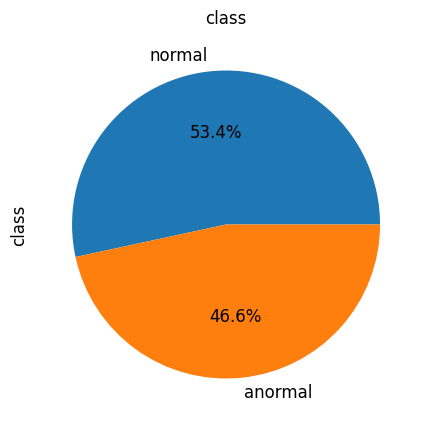

In [3]:
import matplotlib.ticker as mtick
ax = (data['class'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['normal', 'anormal'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('class',fontsize = 12)
ax.set_title('class', fontsize = 12)

# **types of protocols and percentage of each one**

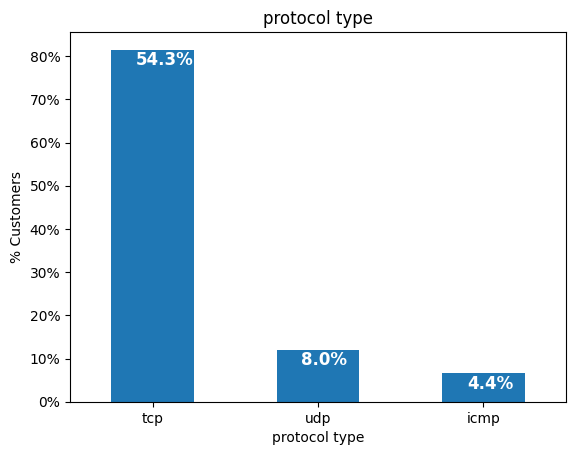

In [4]:

ax = (data['protocol_type'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0
                                                                          )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('protocol type')
ax.set_ylabel('% Customers')
ax.set_title('protocol type')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [5]:
data.groupby(['protocol_type'], as_index=False)['class'].count()

,protocol_type,class
0,icmp,1655
1,tcp,20526
2,udp,3011


# **number of each type of service**

In [6]:
data['service'].value_counts()

,count
service,
http,8003
private,4351
domain_u,1820
smtp,1449
ftp_data,1396
...,...
urh_i,4
red_i,3
pm_dump,3


In [7]:
data.groupby(['service'], as_index=False)['class'].count().max()

,0
service,whois
class,8003


# **number of each type of flag**

In [8]:
data['flag'].value_counts()

,count
flag,
SF,14973
S0,7009
REJ,2216
RSTR,497
RSTO,304
S1,88
SH,43
RSTOS0,21
S2,21


In [9]:
data.groupby(['flag'], as_index=False)['class'].count()

,flag,class
0,OTH,5
1,REJ,2216
2,RSTO,304
3,RSTOS0,21
4,RSTR,497
5,S0,7009
6,S1,88
7,S2,21
8,S3,15
9,SF,14973


# **number of failed_login**

In [10]:
data['num_failed_logins'].value_counts()

,count
num_failed_logins,
0,25169
1,19
2,2
3,1
4,1


# **number and percentage of logged in for each class**

logged_in
0    15247
1     9945
Name: count, dtype: int64


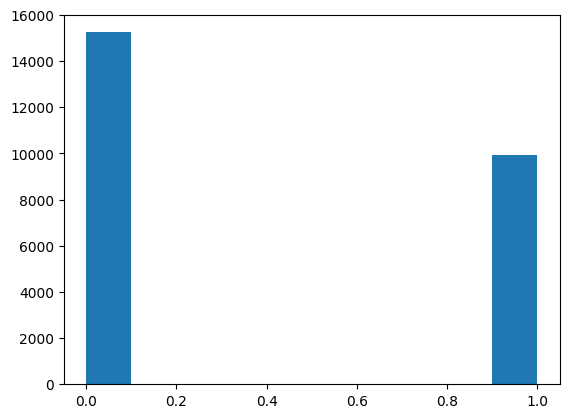

In [11]:
import matplotlib.pyplot as plt

print(data['logged_in'].value_counts())

plt.hist(data['logged_in'])
plt.show()

Text(0.5, 1.0, 'logged_in')

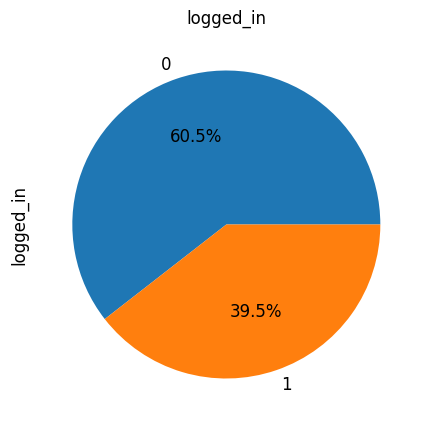

In [12]:
ax = (data['logged_in'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['0', '1'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('logged_in',fontsize = 12)
ax.set_title('logged_in', fontsize = 12)

# **First checks**


# **Features non-null values and data type**

In [13]:
# First checks
print('Features non-null values and data type:')
data.info()

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192

In [14]:
data.columns!=0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Text(0.5, 1.0, 'logged_in')

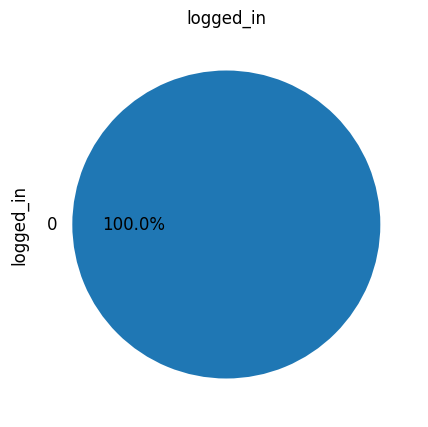

In [15]:
ax = (data['num_outbound_cmds'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('logged_in',fontsize = 12)
ax.set_title('logged_in', fontsize = 12)

In [16]:
data[data['num_outbound_cmds']!=0]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


In [17]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [18]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **missing values**

In [19]:
# verification of null values
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [20]:
print(f"Number of null values: {data.isnull().sum()}")

Number of null values: duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate       

# **duplicated values**:



In [21]:
# check if there are a duplicated values or not
data.drop_duplicates(inplace=True)
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 0


# **Outliners**

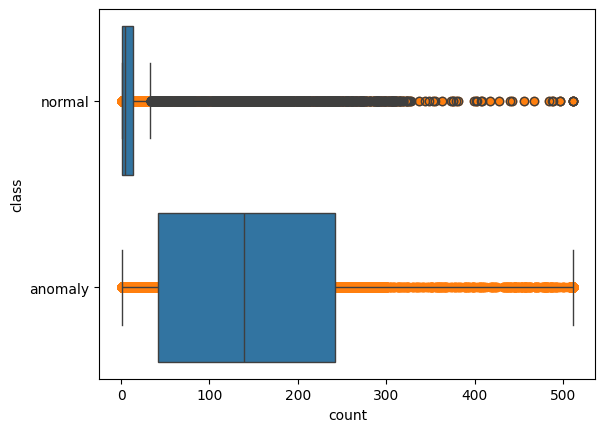

In [22]:
# Assuming 'is_host_login' and 'class' are the columns you want to plot
sns.boxplot(x=data['count'], y=data['class'], data=data)

# Assign values to x and y based on the columns you want to visualize
x = data['count']
y = data['class']
plt.scatter(x, y)
plt.show()

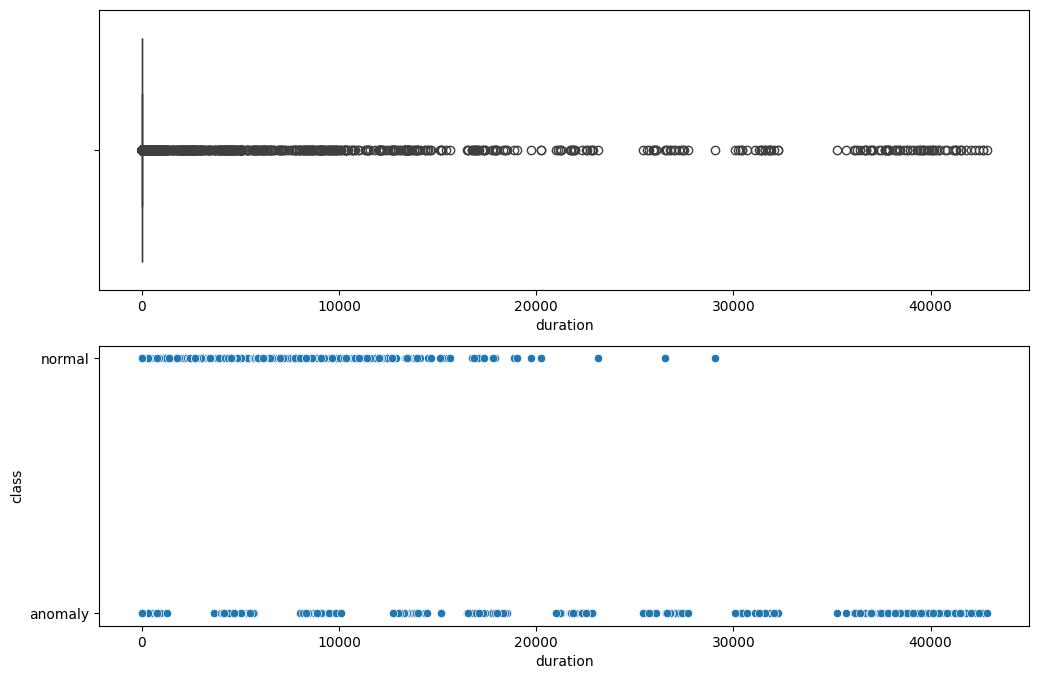

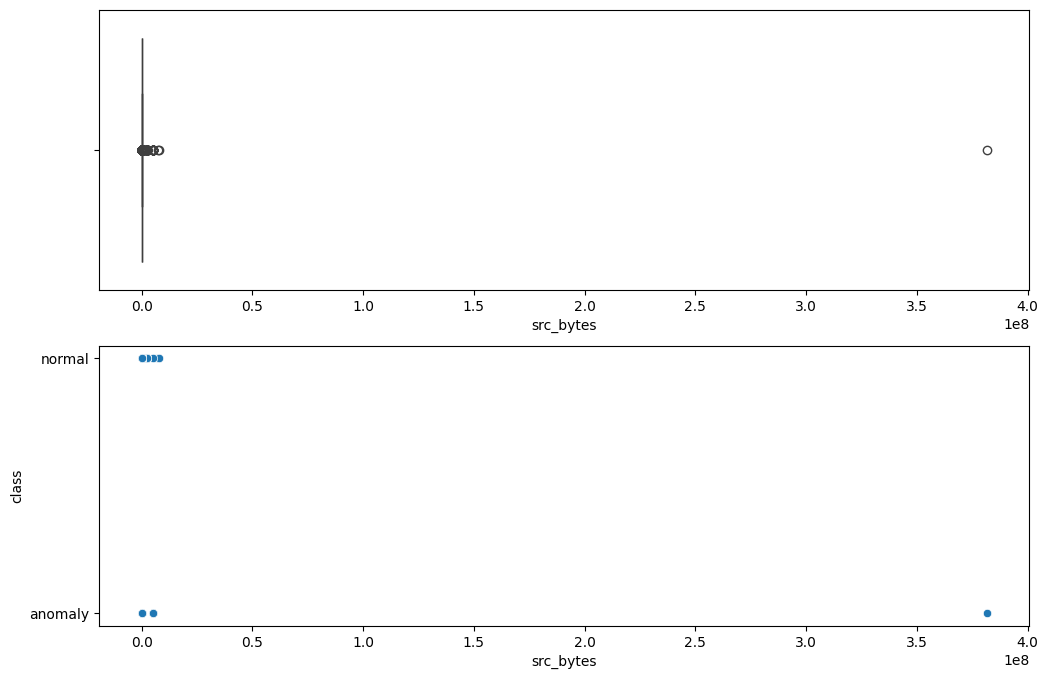

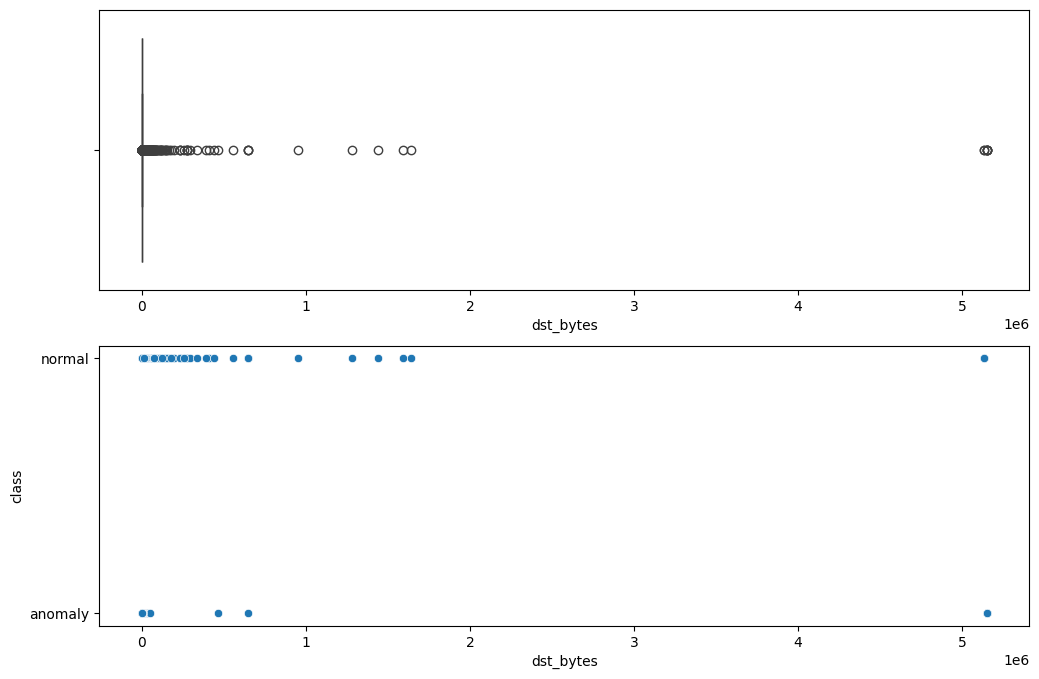

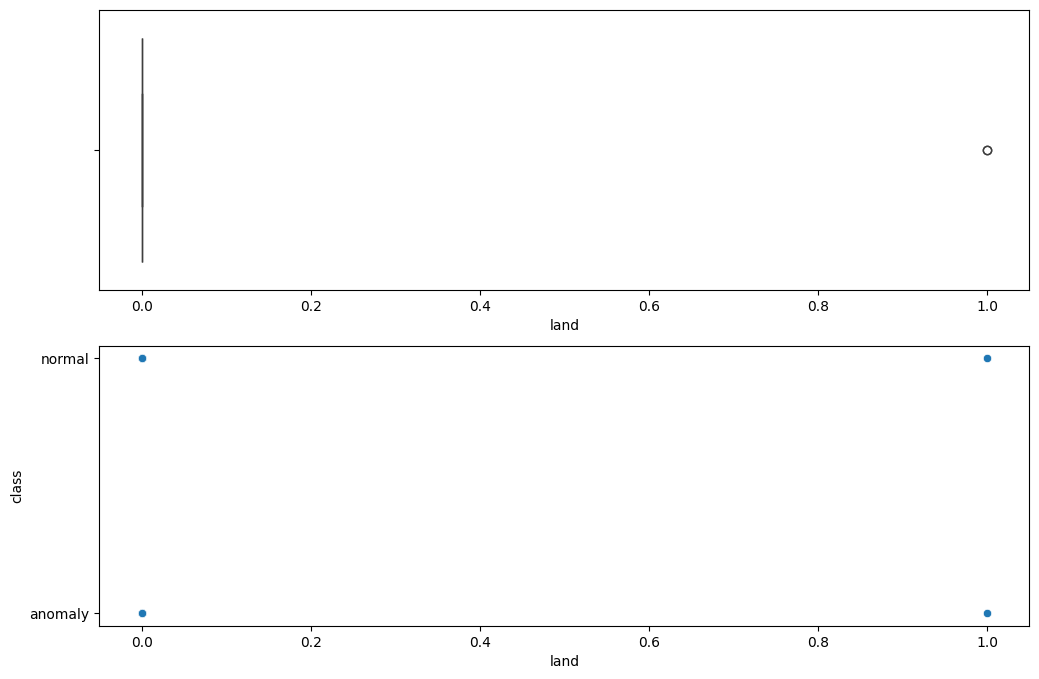

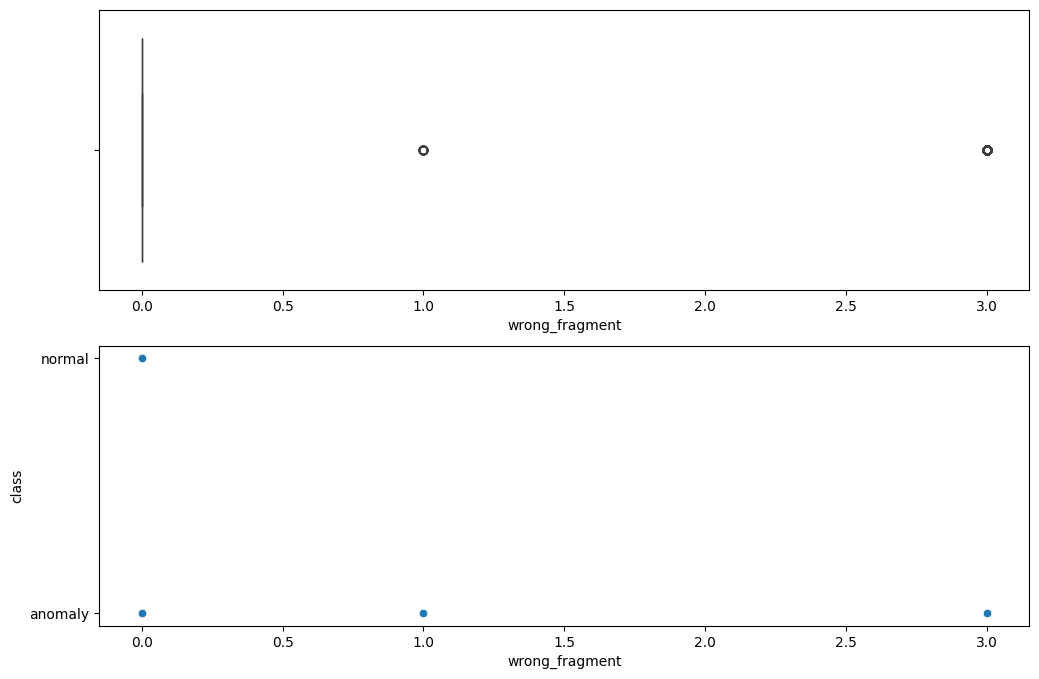

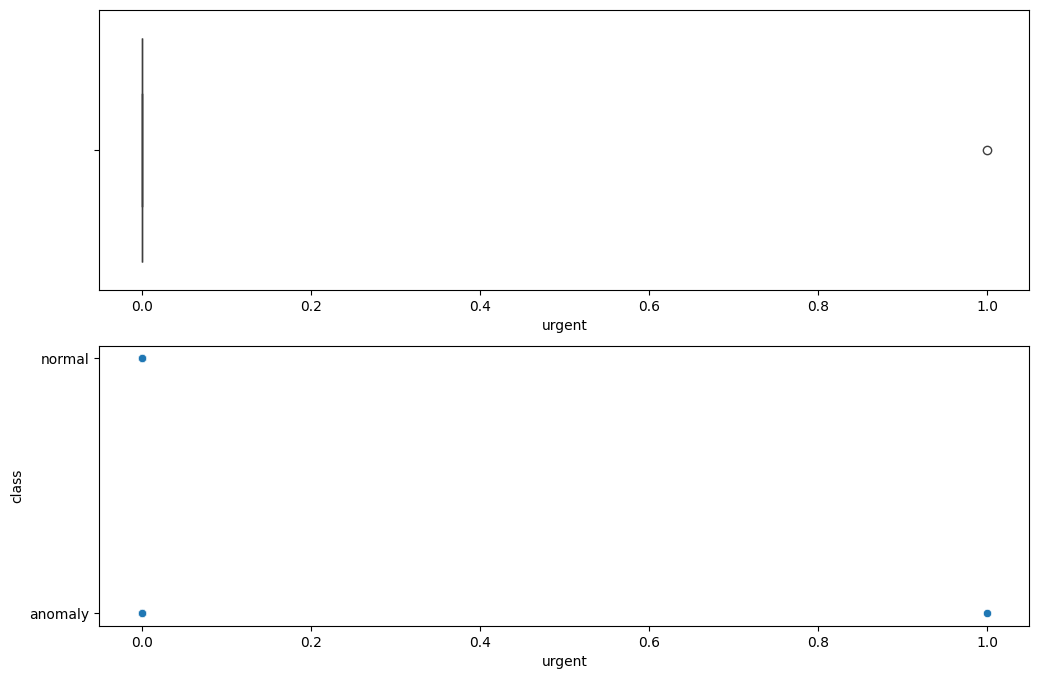

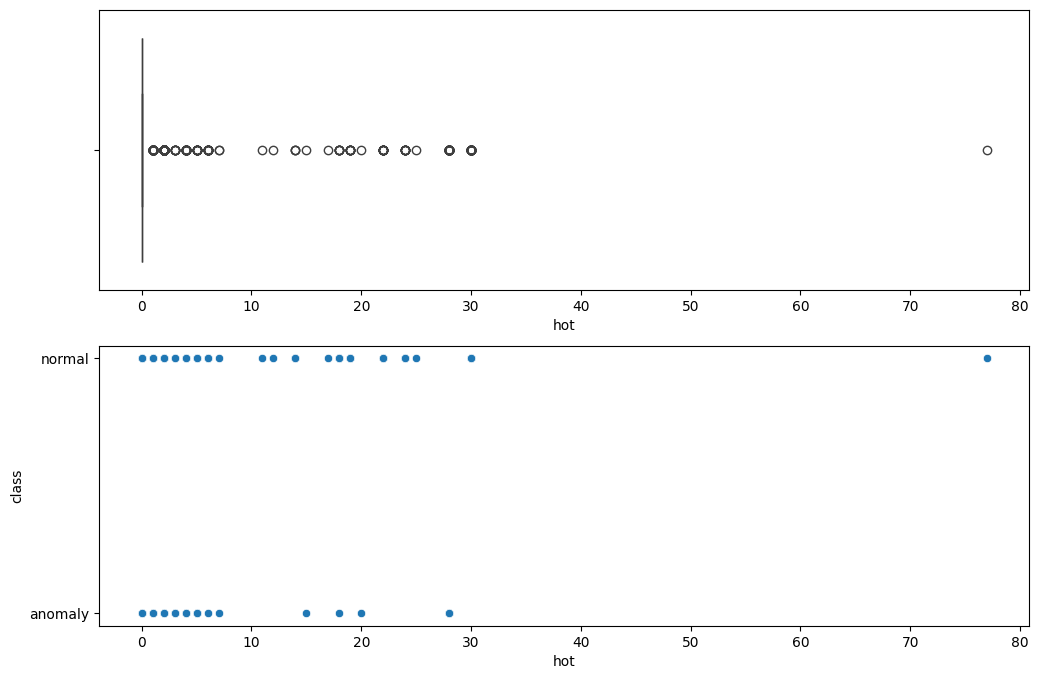

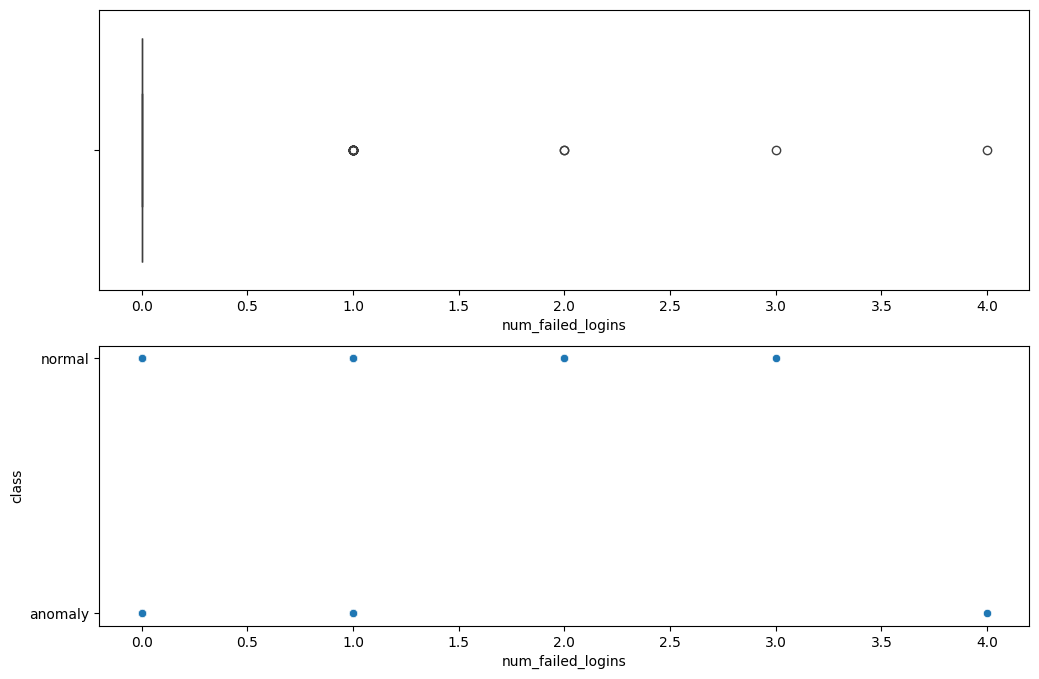

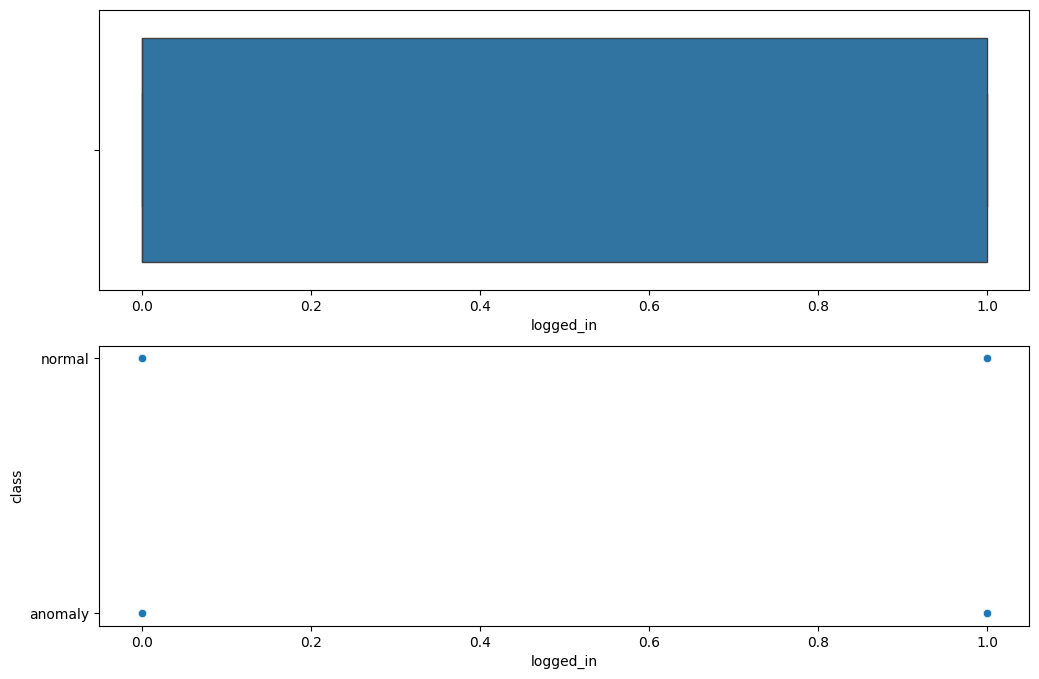

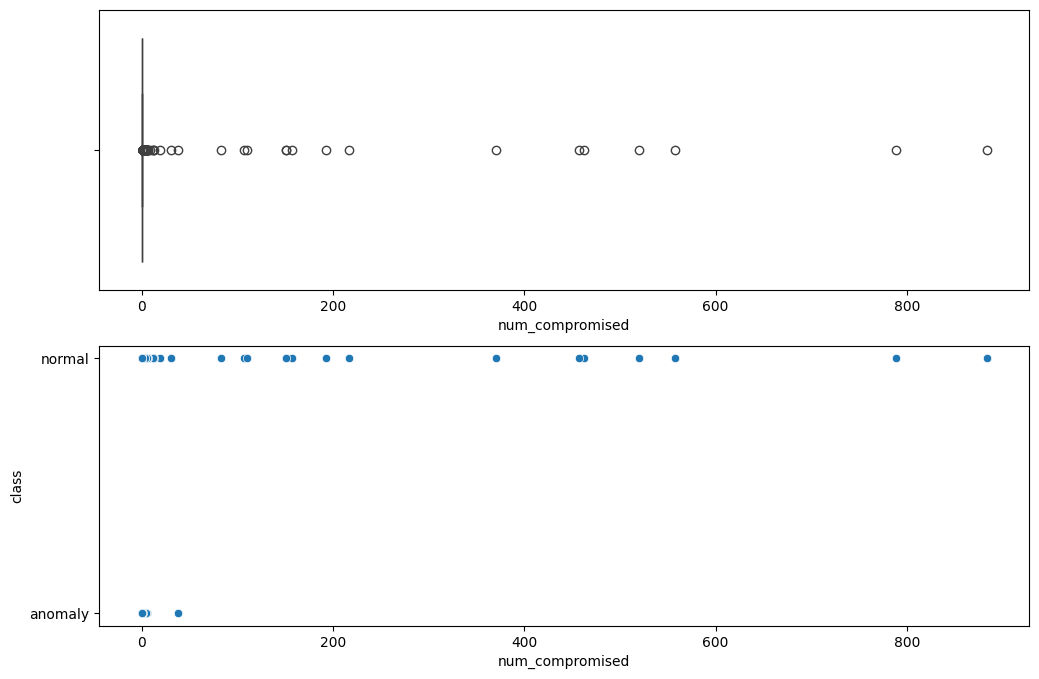

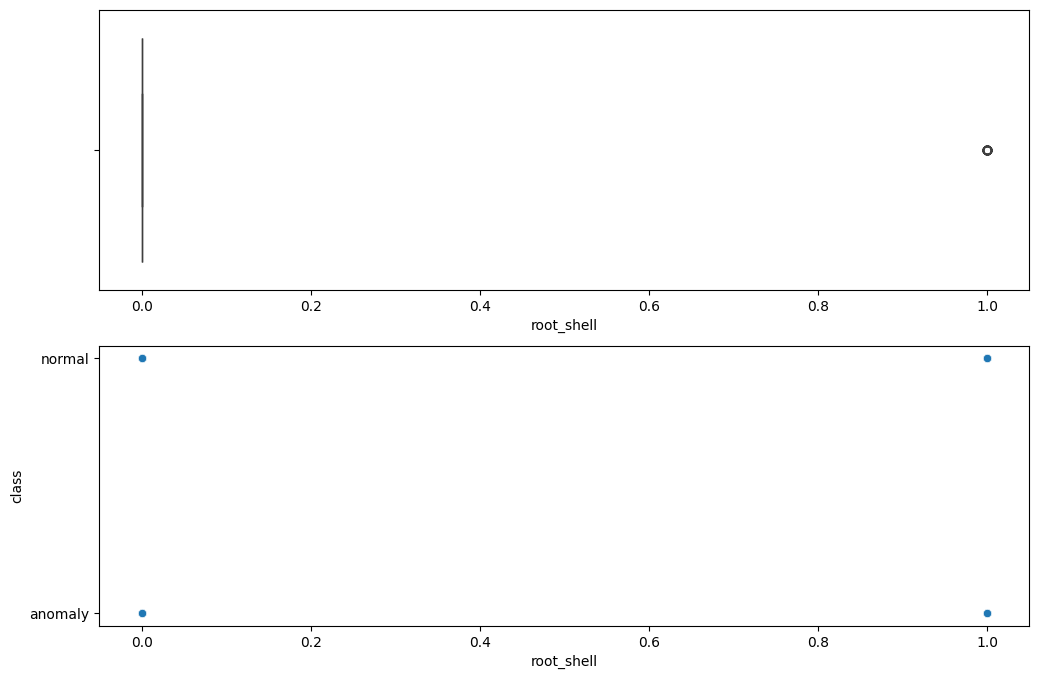

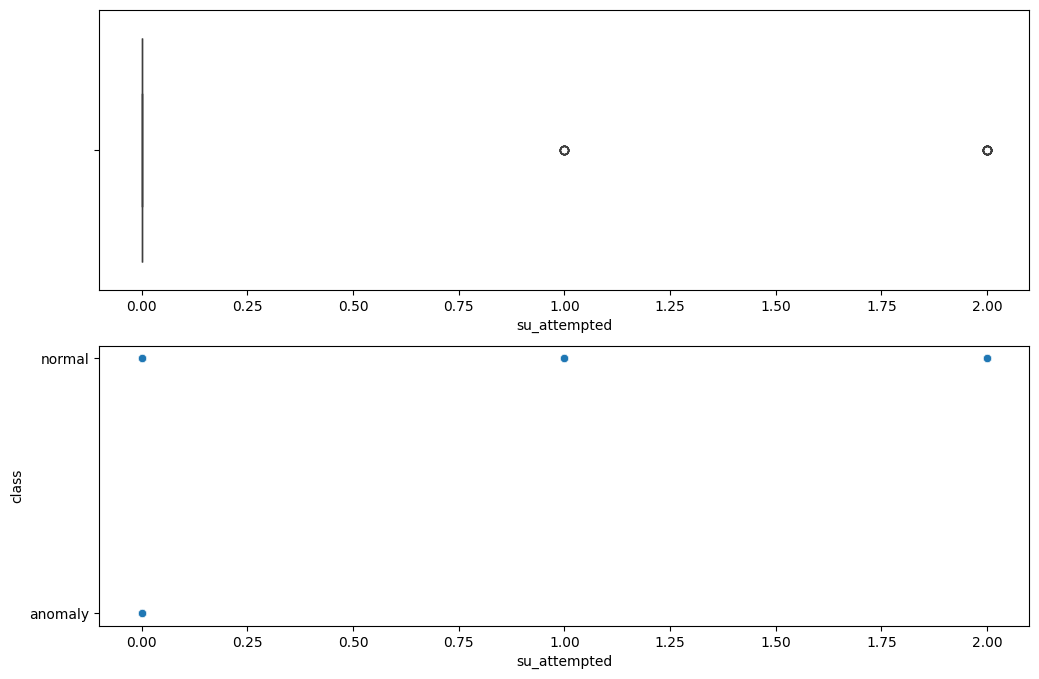

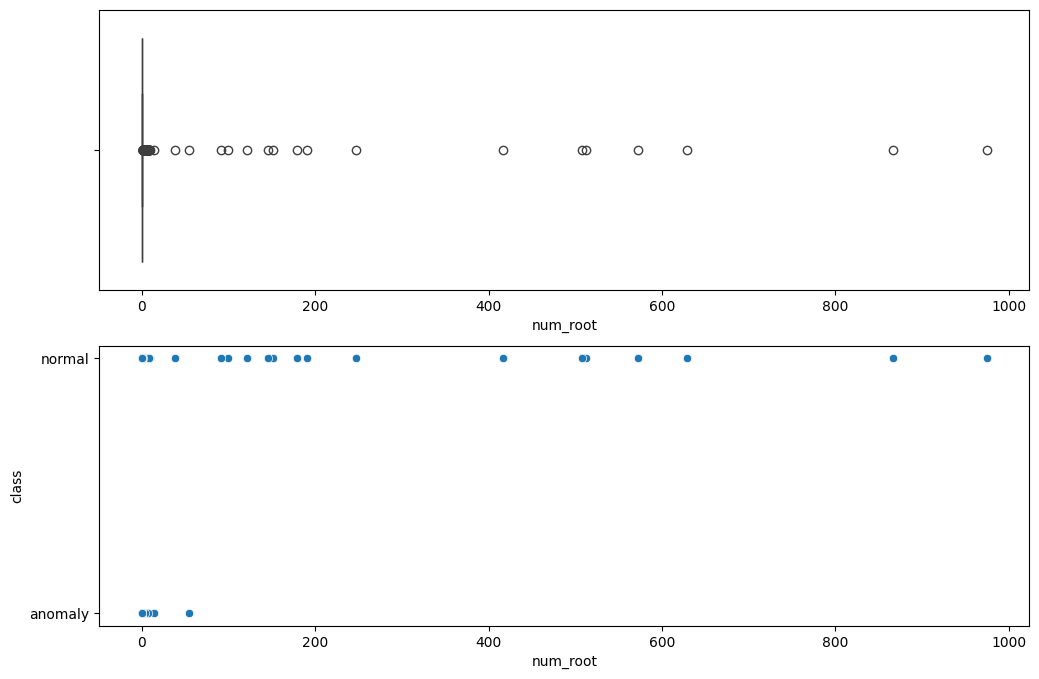

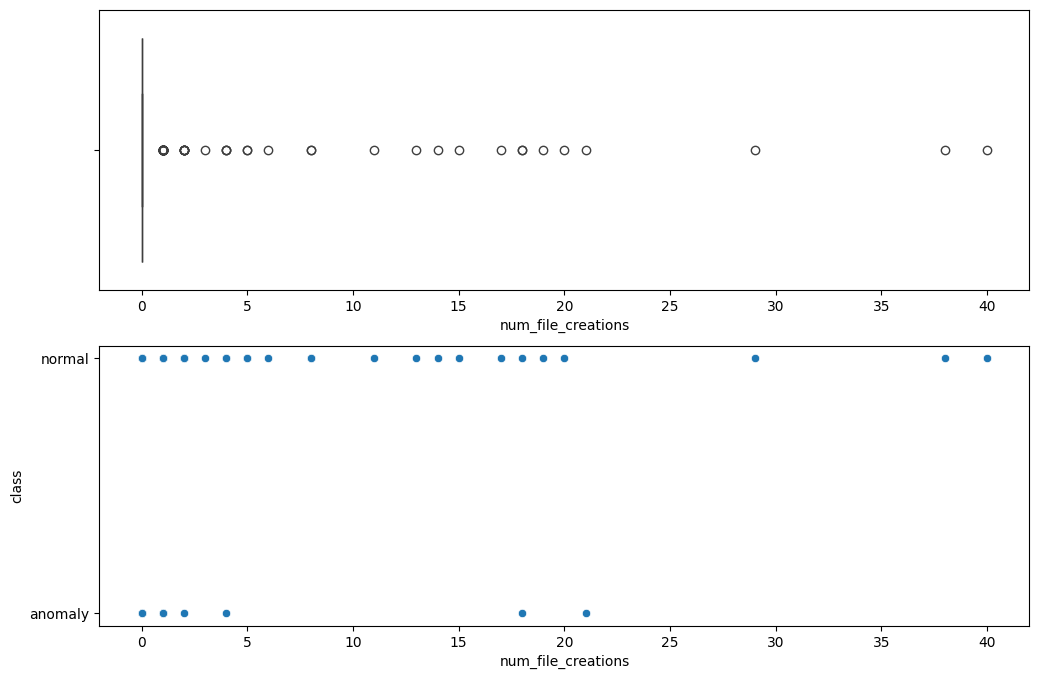

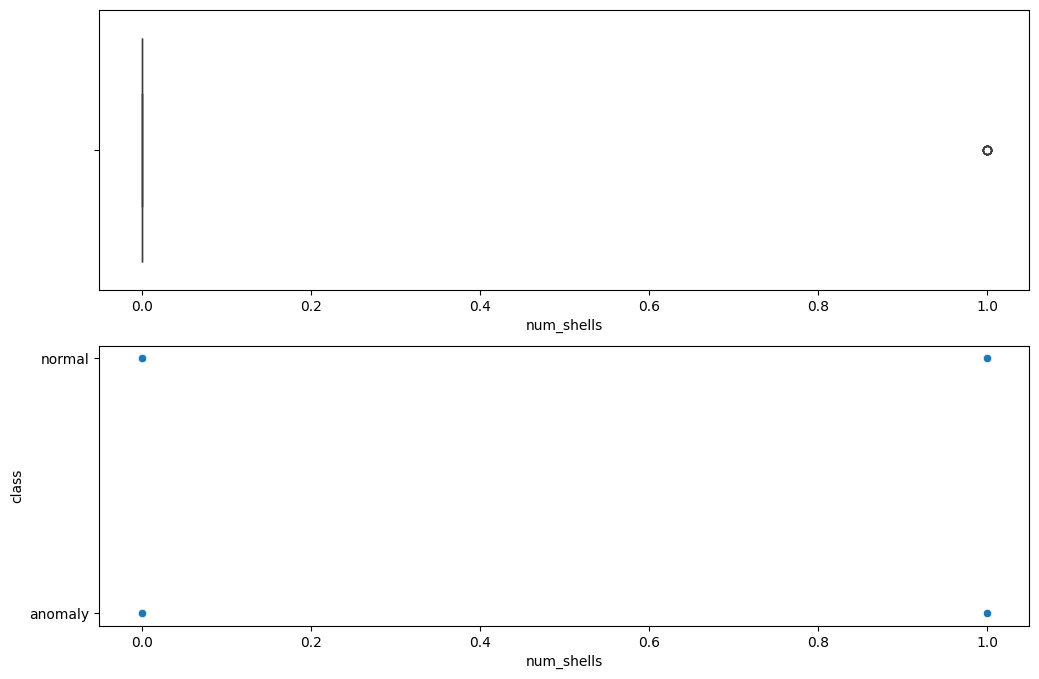

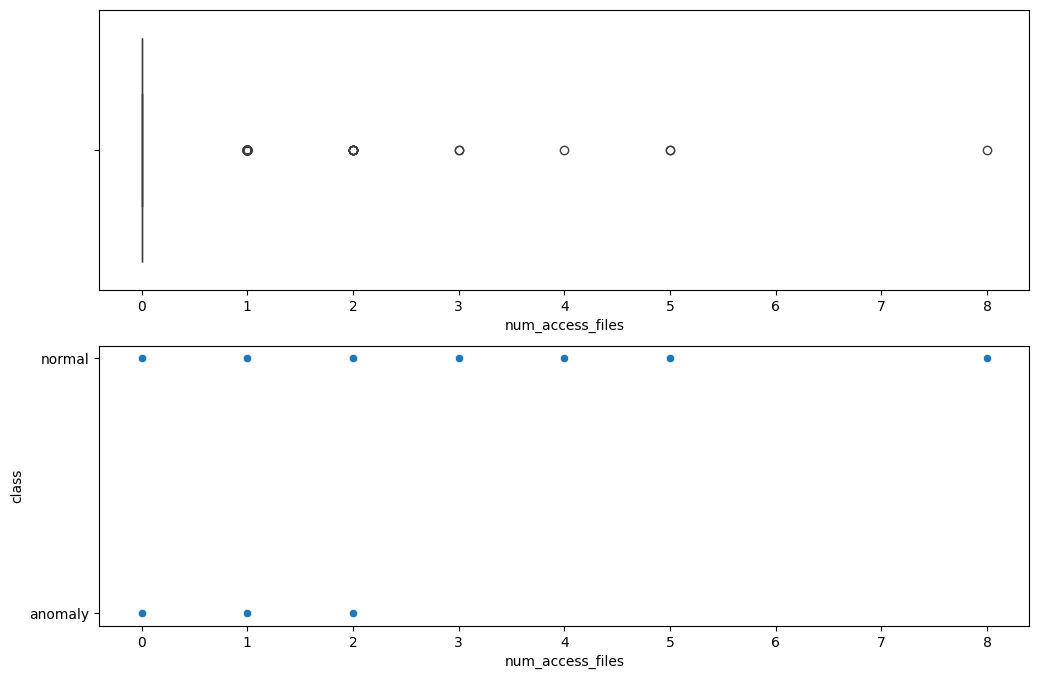

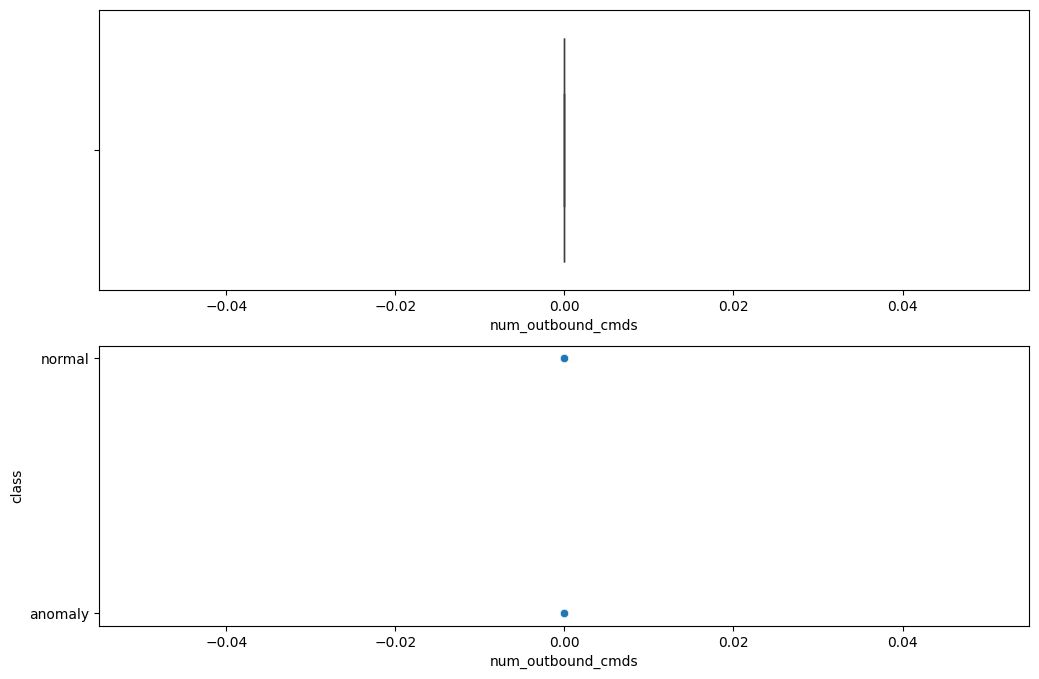

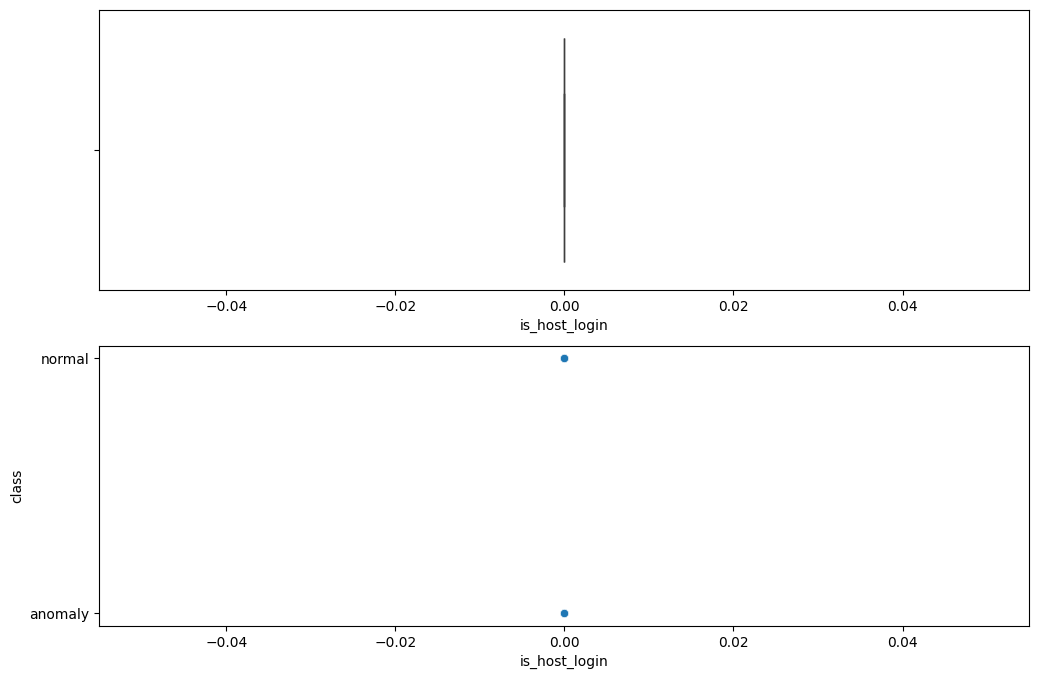

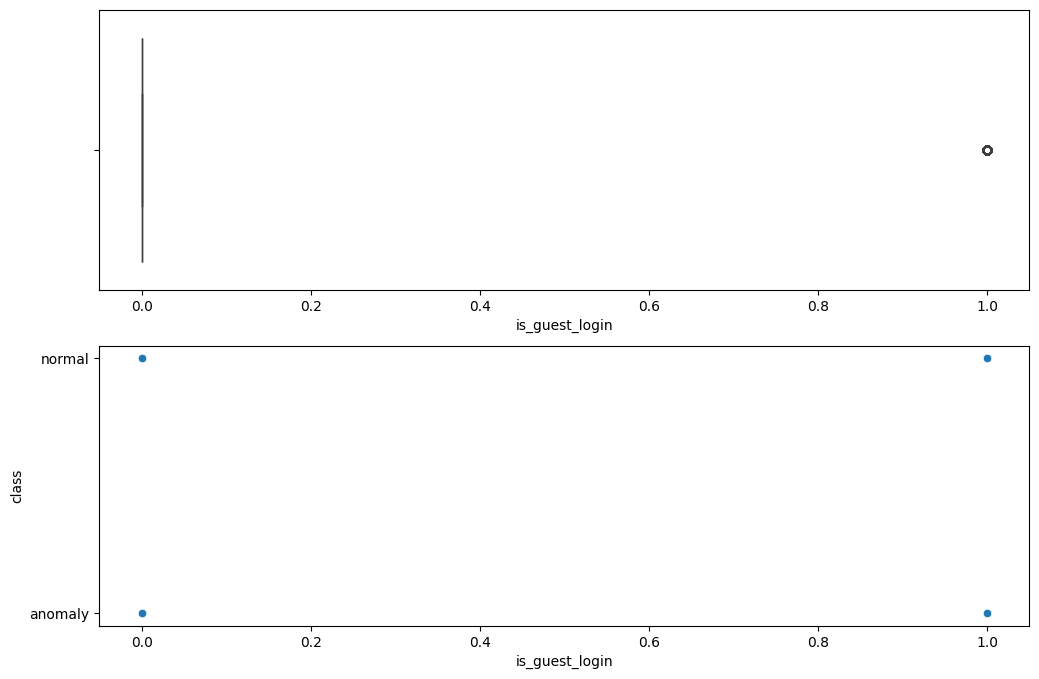

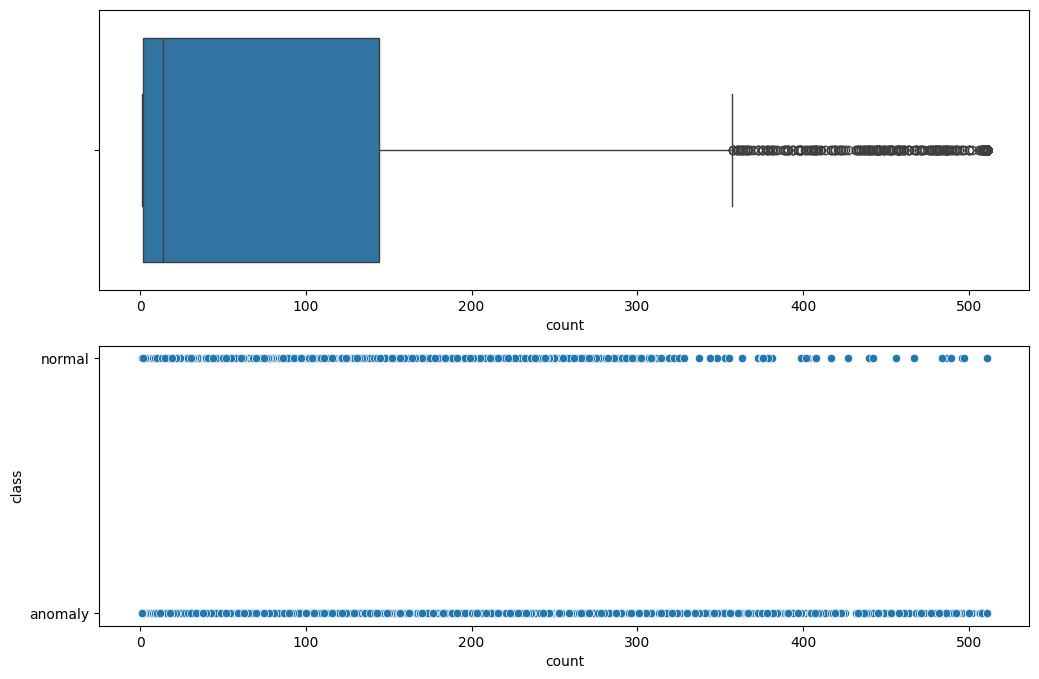

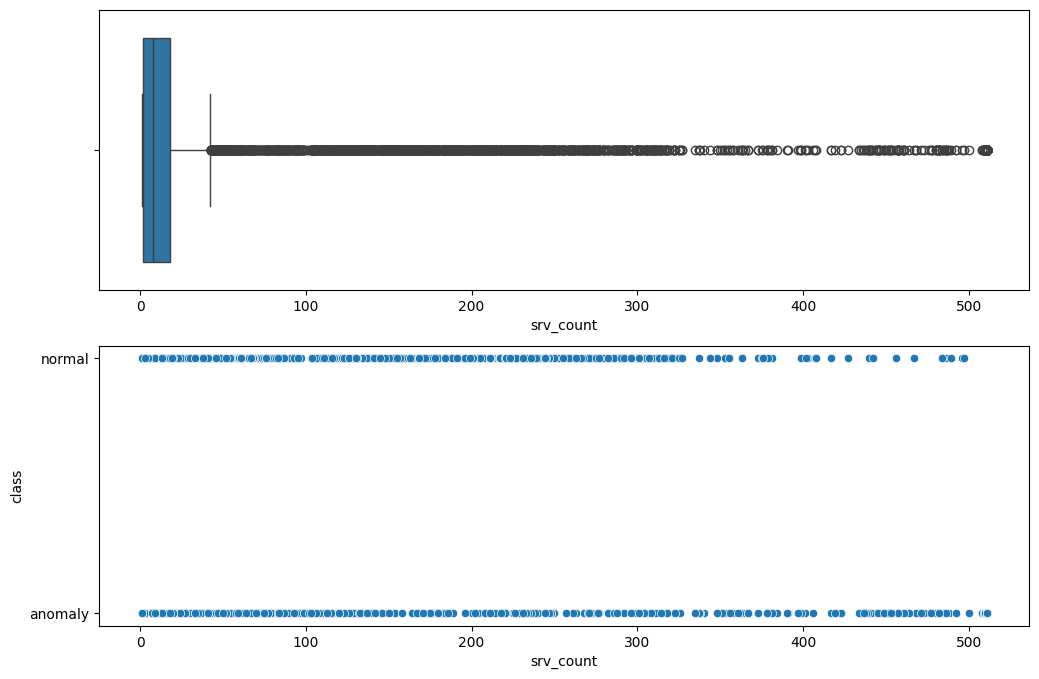

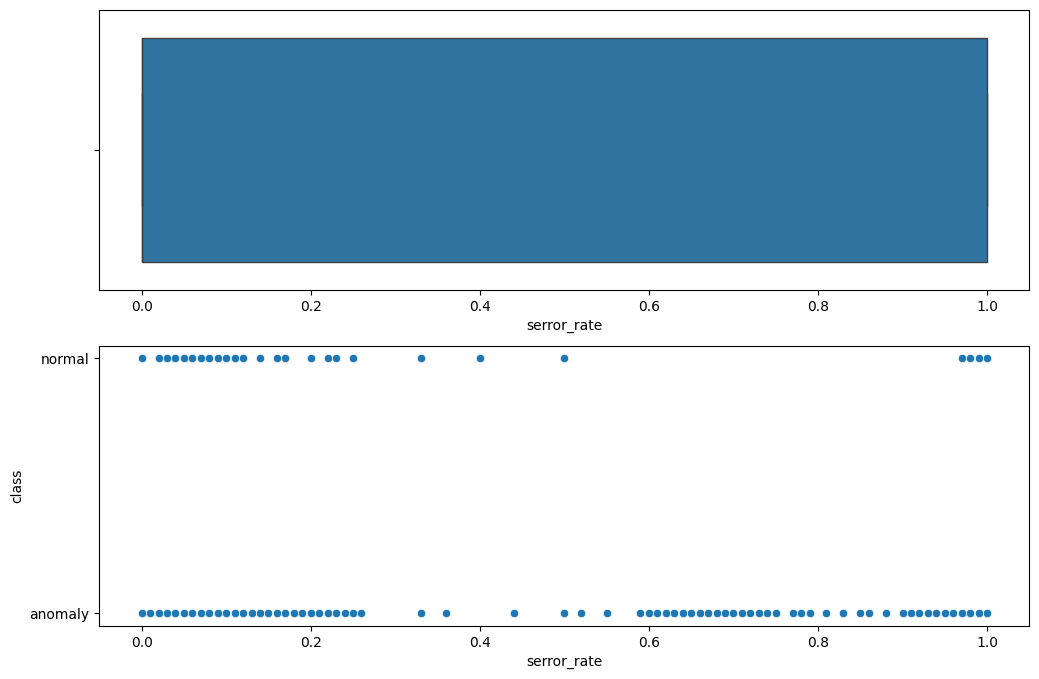

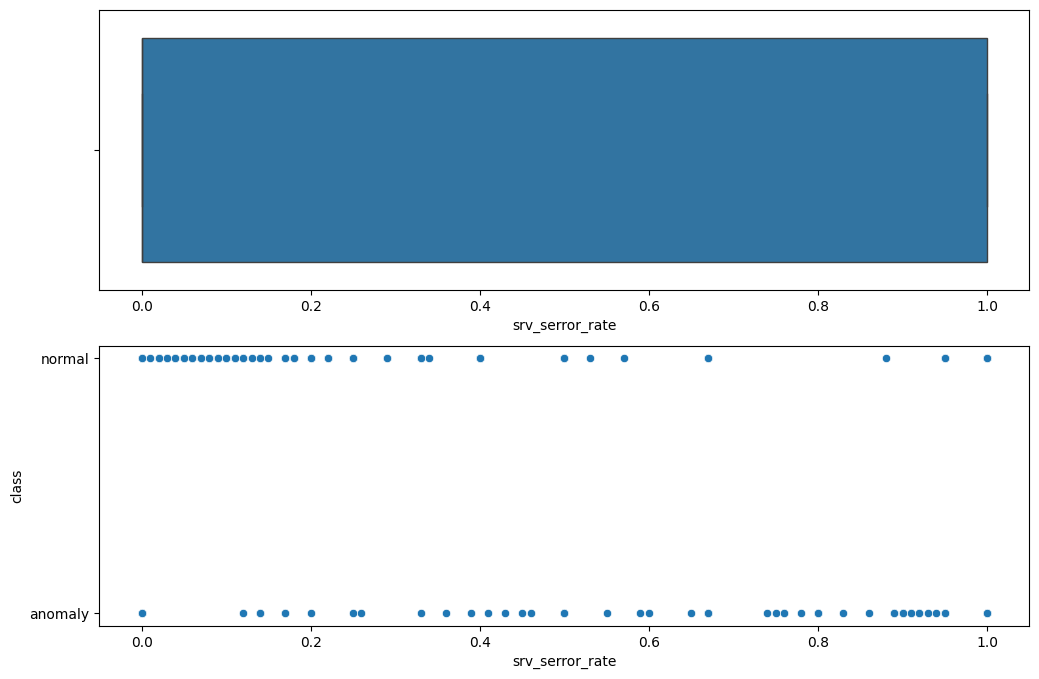

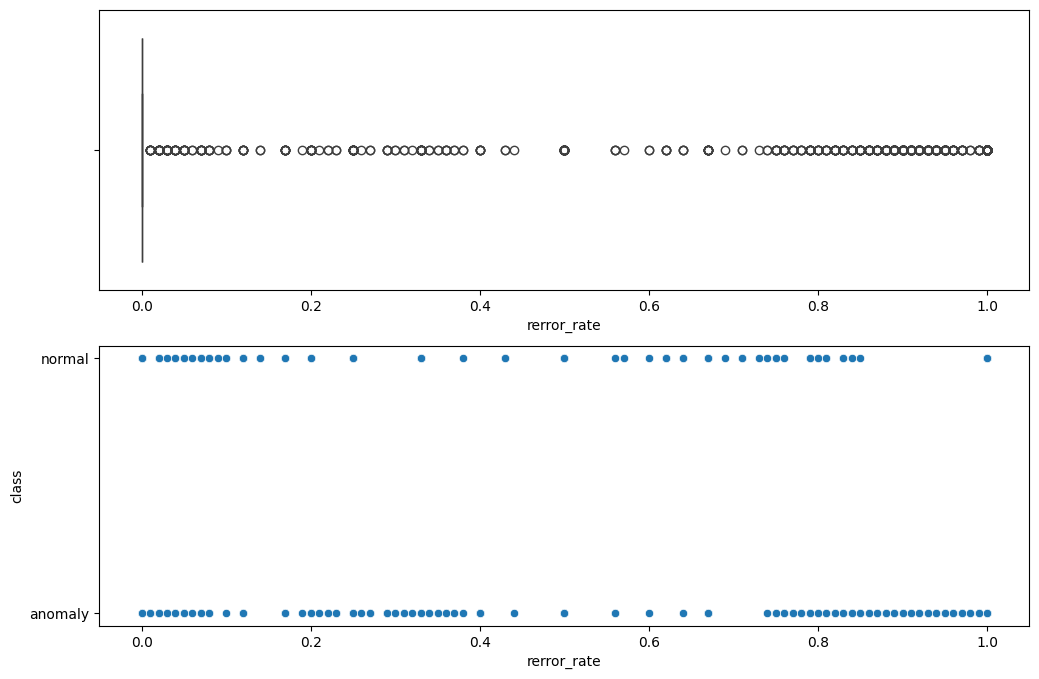

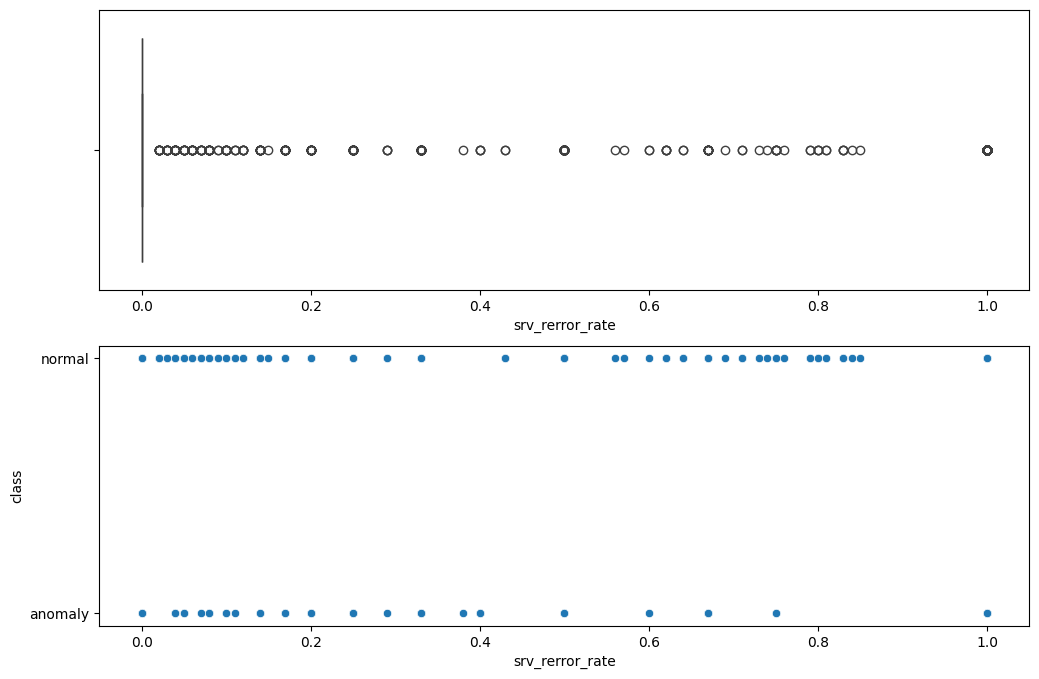

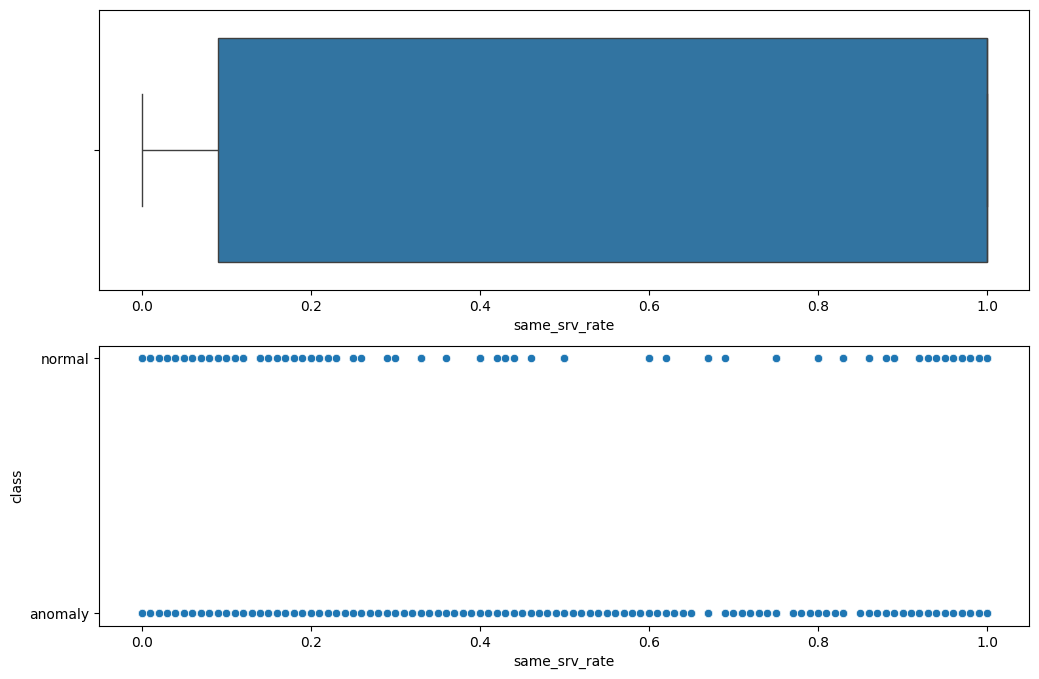

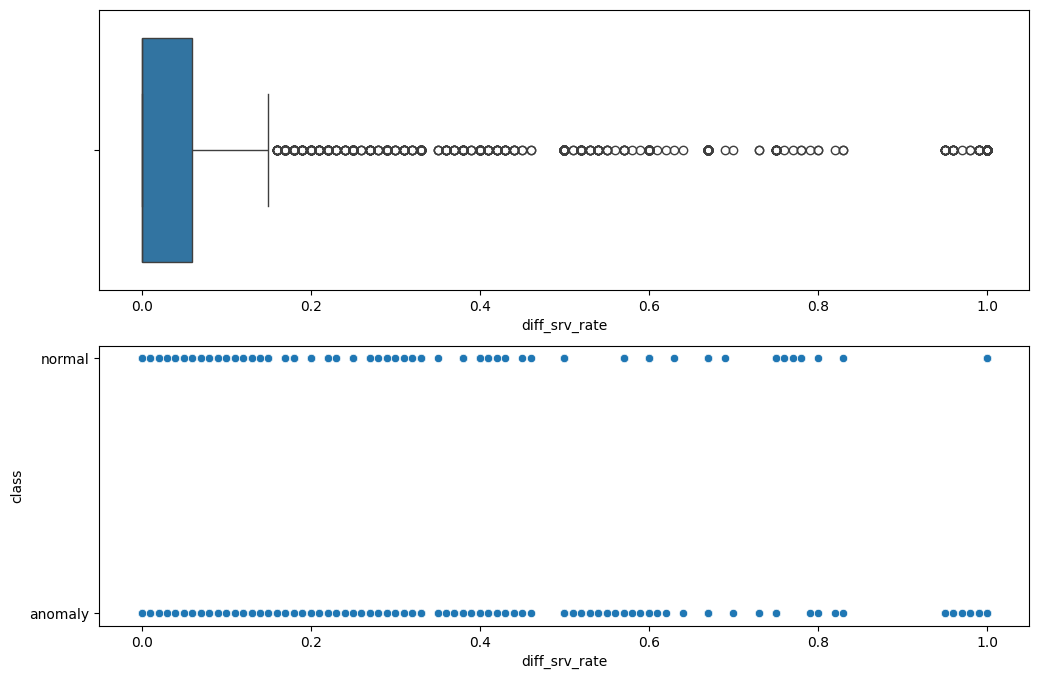

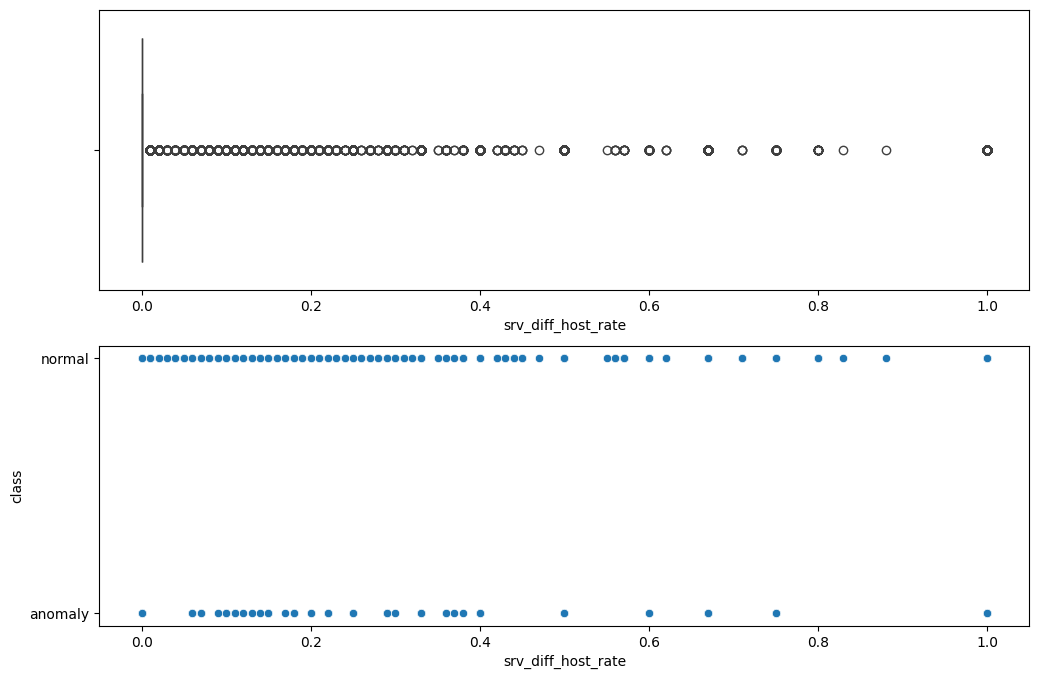

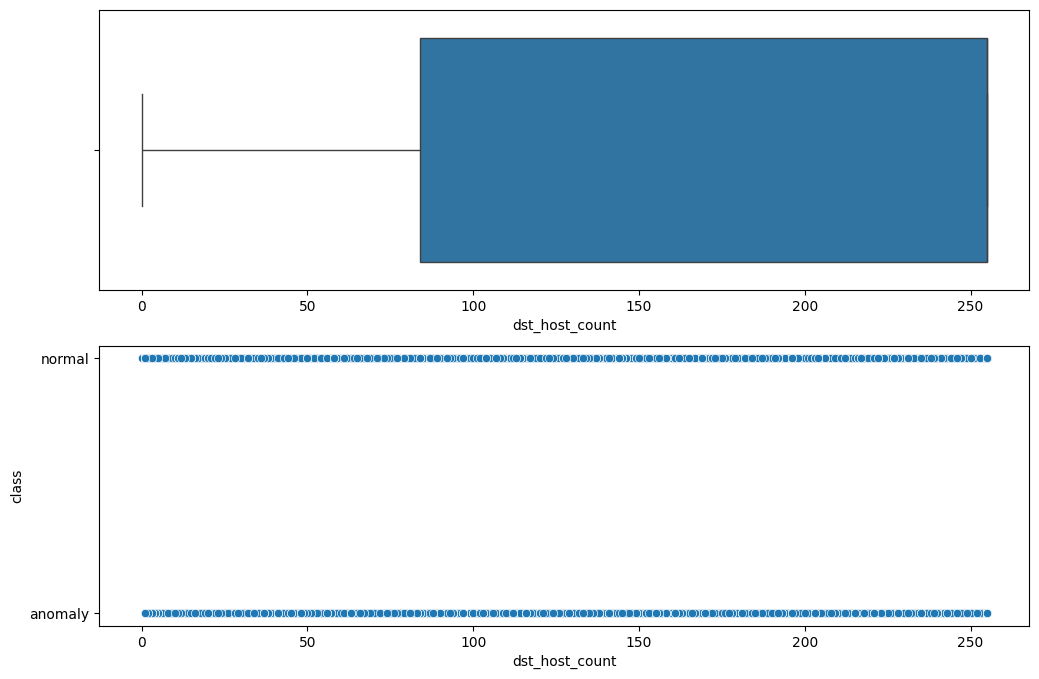

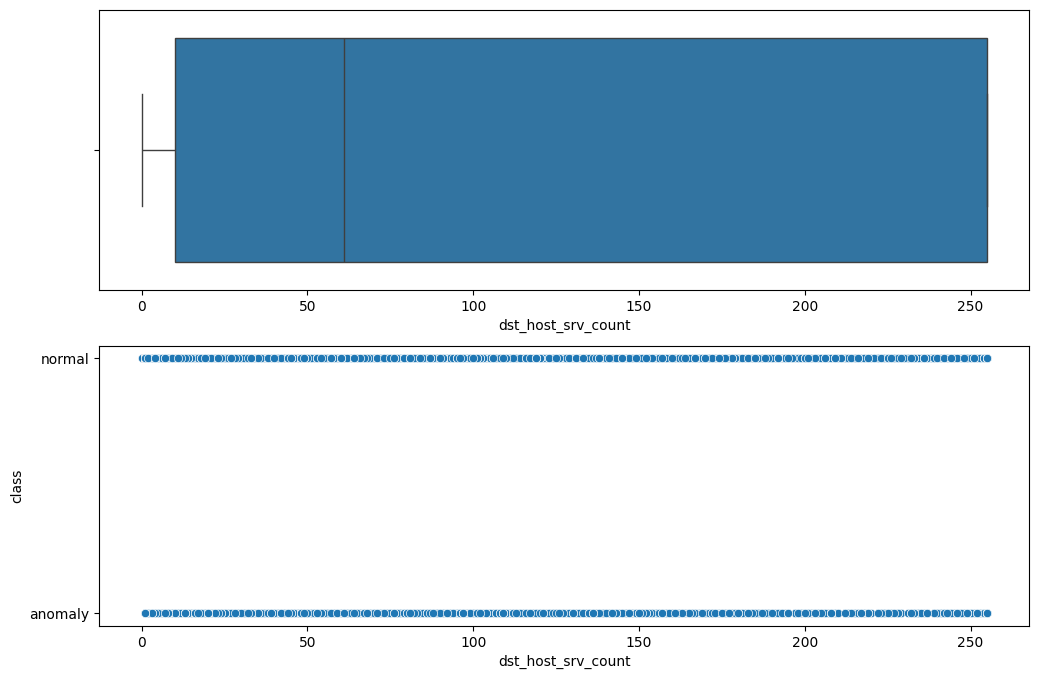

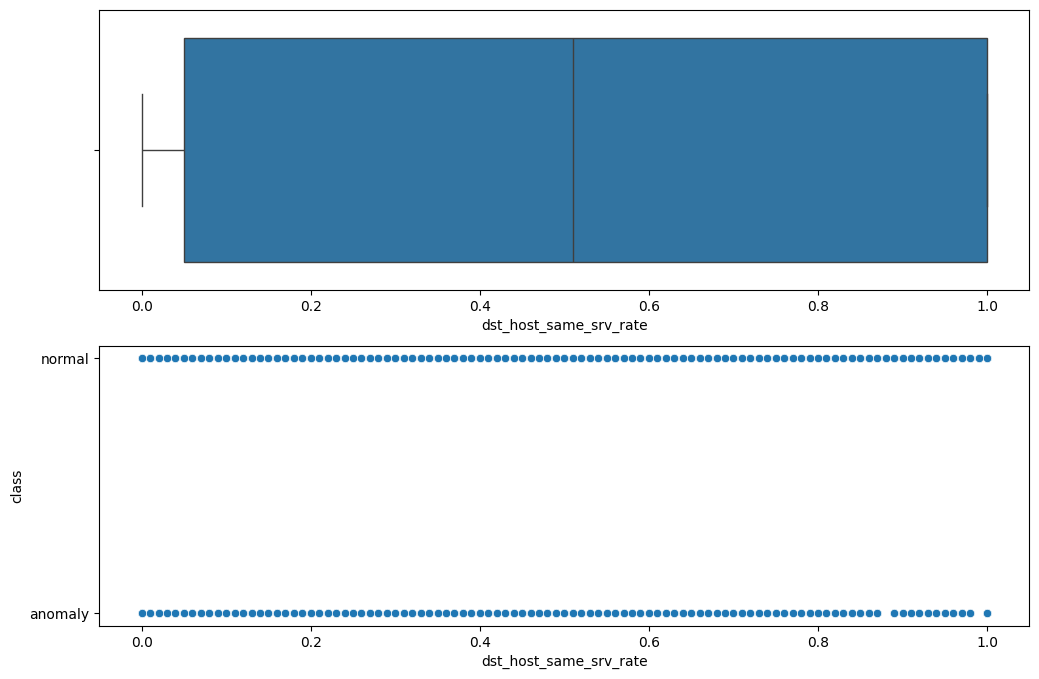

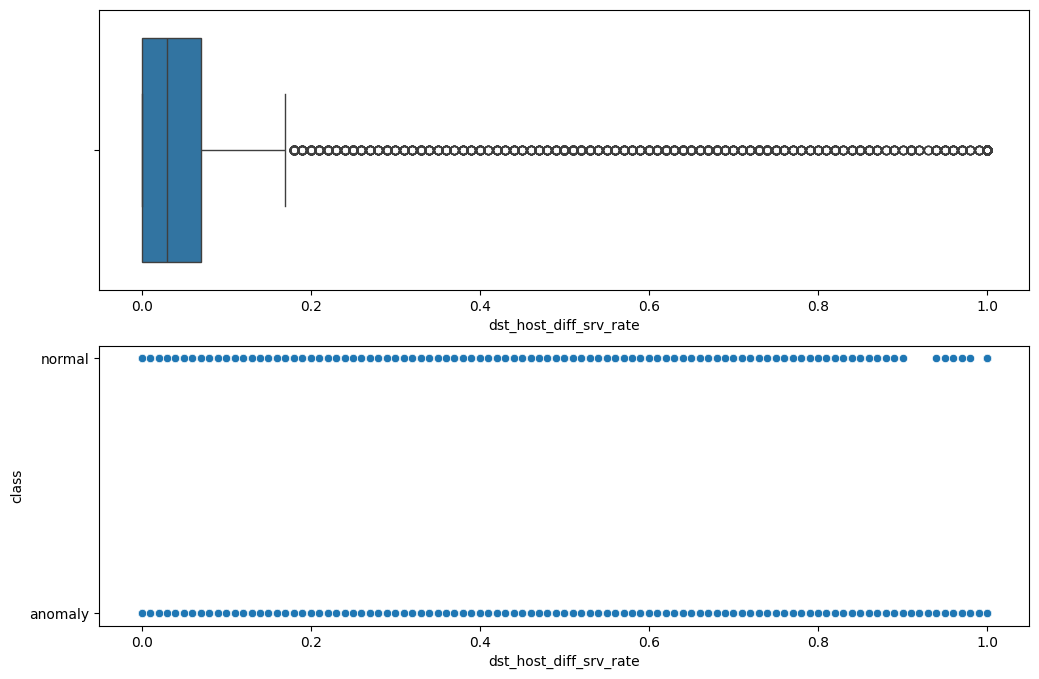

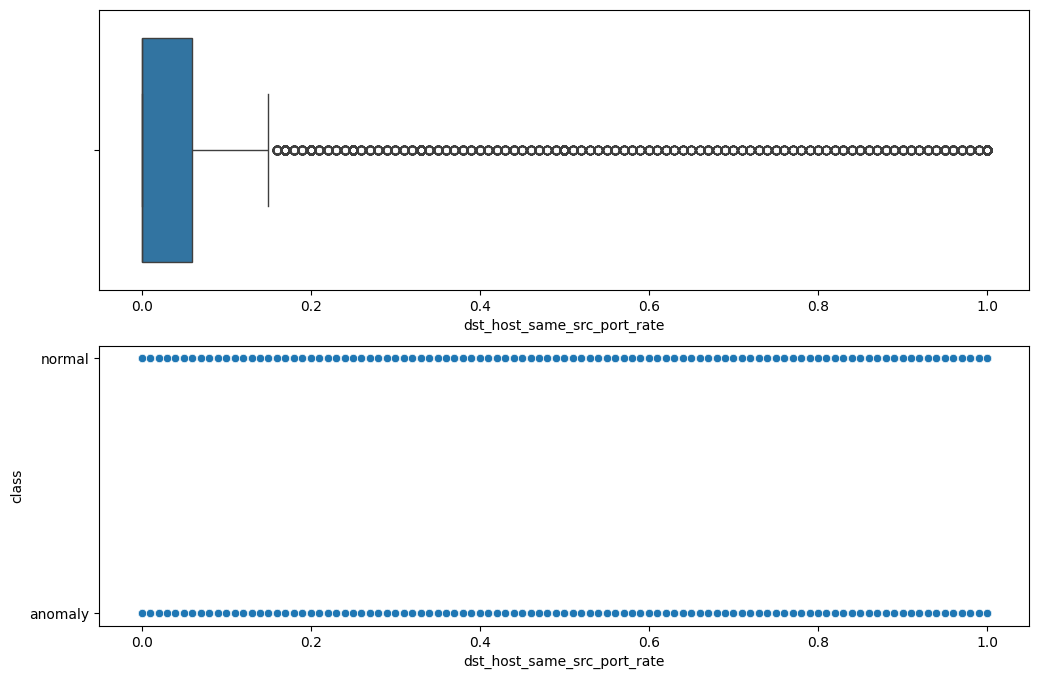

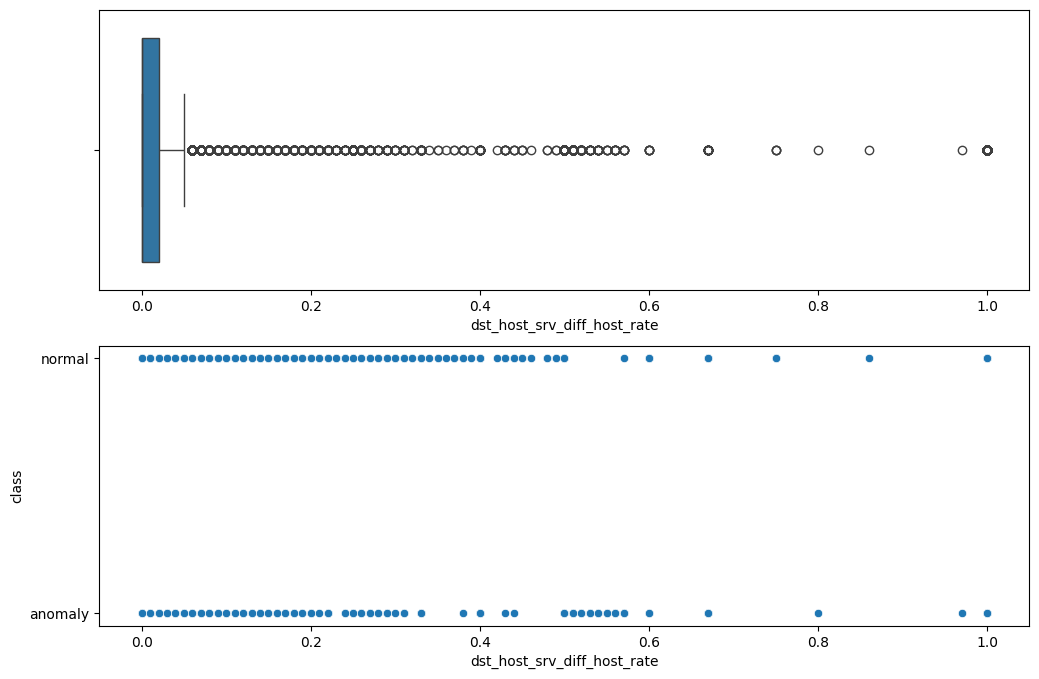

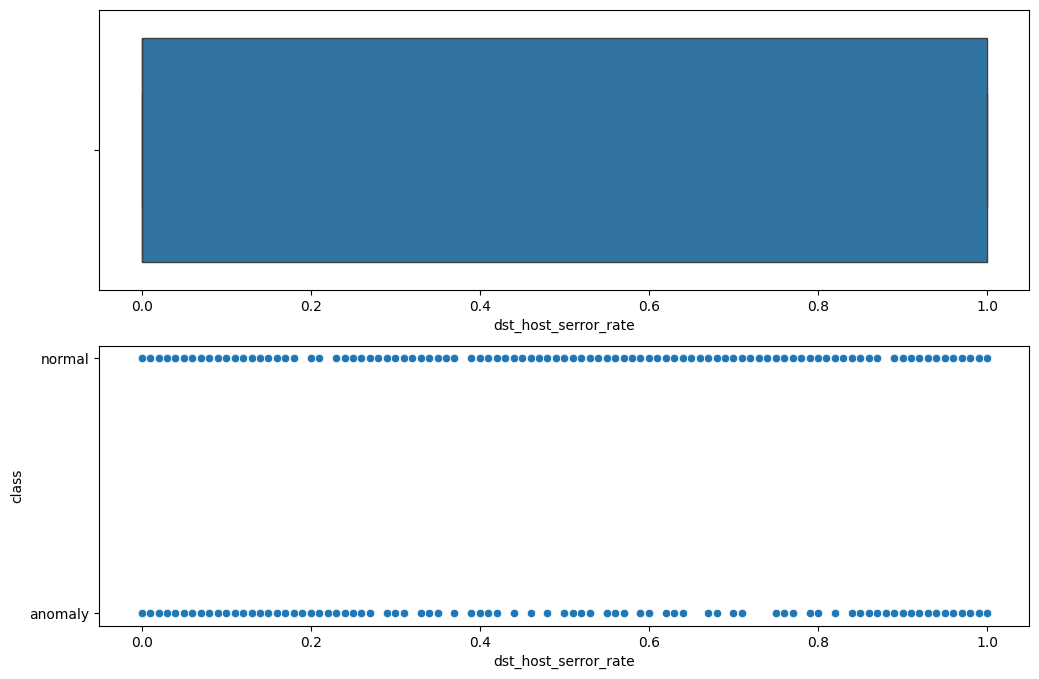

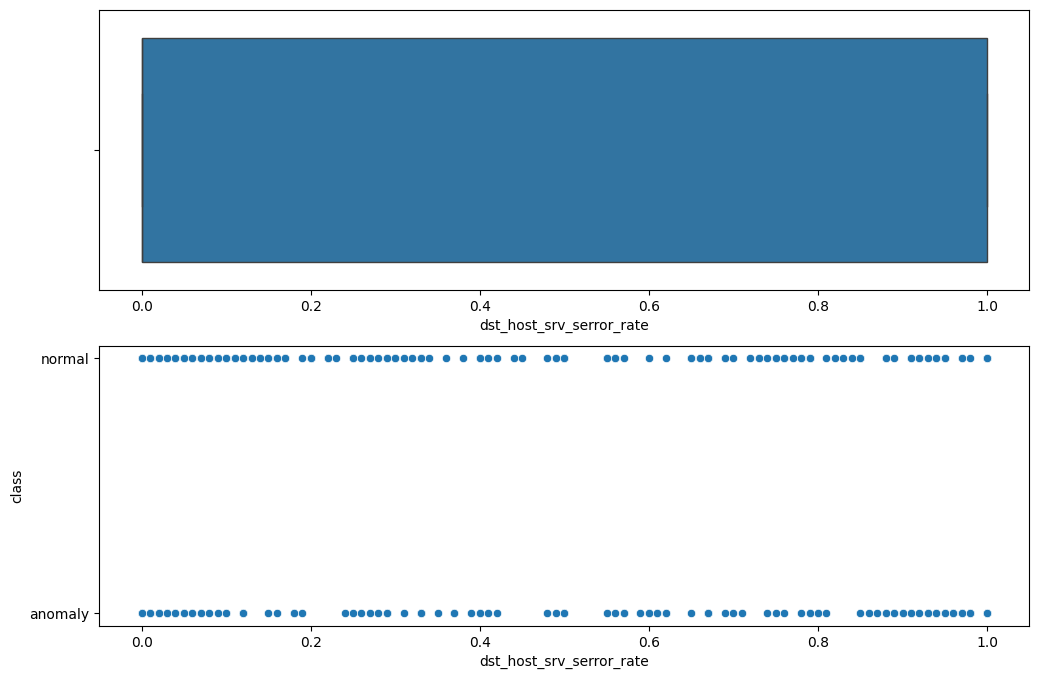

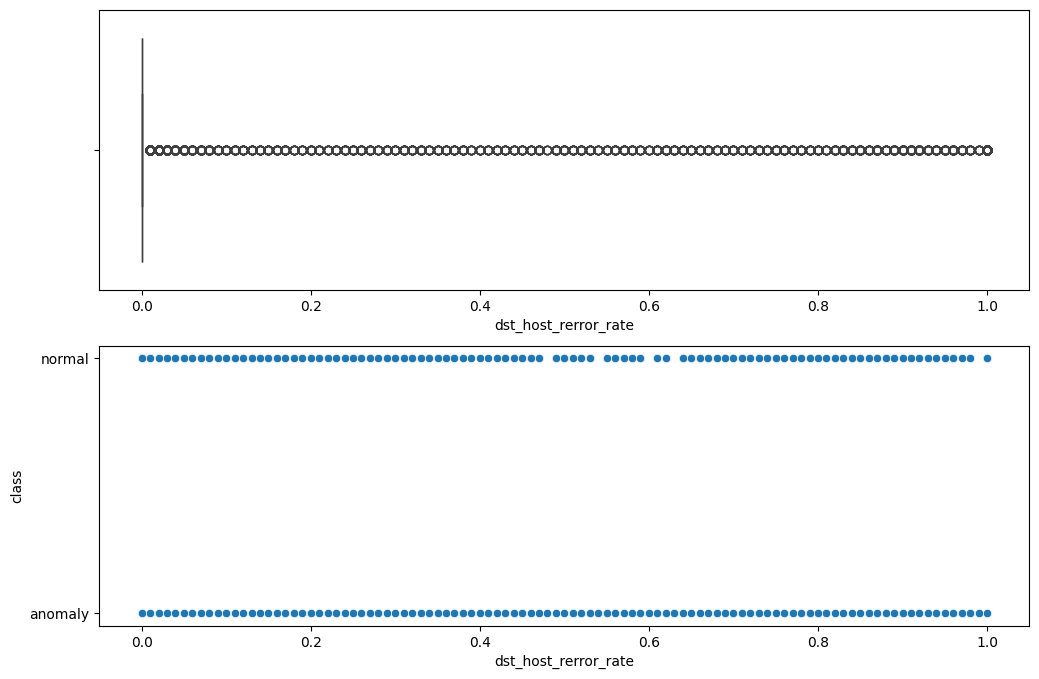

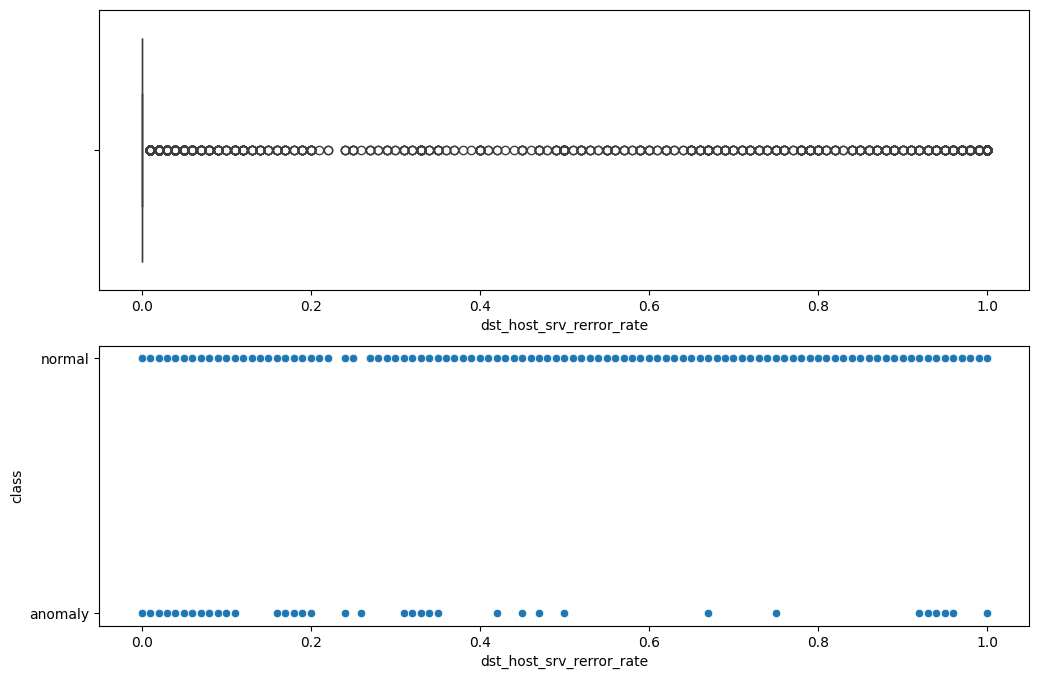

In [23]:
for col in data:
    if col != 'class' and pd.api.types.is_numeric_dtype(data[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = data[col], ax=ax[0])
        g2 = sns.scatterplot(data=data, x=data[col],y=data['class'], ax=ax[1])
        plt.show()

# **Label Encoding**

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

le(data)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent', etc.
input_data_imputed = pd.DataFrame(imputer.fit_transform(data))
input_data_imputed.columns = data.columns



In [26]:
input_data_dropped =data.dropna()  # Drops rows with any missing values


In [27]:
#Drop the redundant feature
data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [28]:
data.shape
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [29]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# **Data Transformation**

In [30]:
X=data.drop(['class'],axis=1)
Y=data['class']
print(X)
print(Y)

       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       19     9        491          0     0   
1             0              2       41     9        146          0     0   
2             0              1       46     5          0          0     0   
3             0              1       22     9        232       8153     0   
4             0              1       22     9        199        420     0   
...         ...            ...      ...   ...        ...        ...   ...   
25187         0              1       16     2          0          0     0   
25188         0              1       19     9        334          0     0   
25189         0              1       46     1          0          0     0   
25190         0              1       38     5          0          0     0   
25191         0              1       17     5          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count

# **split the data**

# **Feature selection**

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize RandomForestClassifier for RFE
#rfc = RandomForestClassifier()

# Apply RFE to select features
#rfe = RFE(rfc, n_features_to_select=10)
#rfe = rfe.fit(X_train, Y_train)

# Ensure X_train is a DataFrame (no changes needed here)
#if not isinstance(X_train, pd.DataFrame):
#    X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])  # Add column names if missing

# Map RFE support to selected feature names (use X_train instead of X)
#selected_features = X_train.columns[rfe.support_].tolist()

# Now use selected features for HistGradientBoostingClassifier
#X_selected = X_train[selected_features]
#model = HistGradientBoostingClassifier()
#model.fit(X_selected, Y_train)

# Output selected features
#print("Selected Features:", selected_features)

In [32]:
selected_features=['protocol_type',
            'service',
            'flag',
            'src_bytes',
            'dst_bytes',
            'count',
            'same_srv_rate',
            'diff_srv_rate',
            'dst_host_srv_count',
            'dst_host_same_srv_rate']

In [33]:
X = X[selected_features]
print(X)

       protocol_type  service  flag  src_bytes  dst_bytes  count  \
0                  1       19     9        491          0      2   
1                  2       41     9        146          0     13   
2                  1       46     5          0          0    123   
3                  1       22     9        232       8153      5   
4                  1       22     9        199        420     30   
...              ...      ...   ...        ...        ...    ...   
25187              1       16     2          0          0    100   
25188              1       19     9        334          0      1   
25189              1       46     1          0          0    105   
25190              1       38     5          0          0    129   
25191              1       17     5          0          0     38   

       same_srv_rate  diff_srv_rate  dst_host_srv_count  \
0               1.00           0.00                  25   
1               0.08           0.15                   1   
2     

# **split the data**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(20153, 10) (5039, 10)
(20153,) (5039,)


#**scale the data **

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale = StandardScaler() # Reinitialize for new data

X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)

# **Modeling**

# **Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,Y_train)
LR

LogisticRegression()

In [37]:
yhat_lr = LR.predict(X_test)
yhat_lr

array([1, 0, 0, ..., 1, 1, 1])

In [38]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat_lr,pos_label=0)

0.8649738008867393

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat_lr, labels=[1,0]))

[[2558  116]
 [ 219 2146]]


Confusion matrix, without normalization
[[2558  116]
 [ 219 2146]]


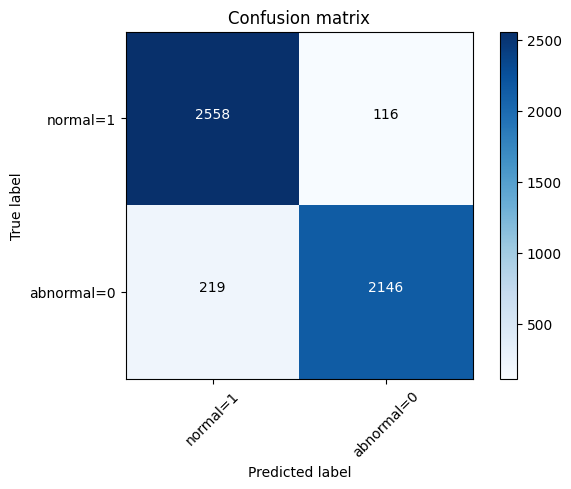

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal=1','abnormal=0'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(Y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2365
           1       0.92      0.96      0.94      2674

    accuracy                           0.93      5039
   macro avg       0.93      0.93      0.93      5039
weighted avg       0.93      0.93      0.93      5039



In [42]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_lr)

2.3962341506954252


# **Support vector machine Model**

In [43]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)


SVC()

In [44]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([0, 1, 0, 1, 1])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2365
           1       0.97      0.98      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039

Confusion matrix, without normalization
[[2270   95]
 [  44 2630]]


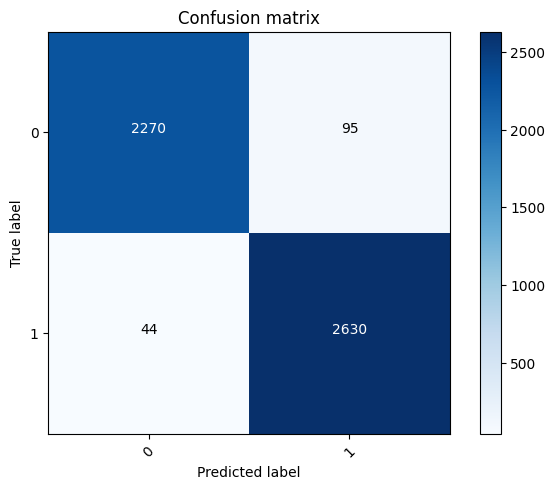

In [46]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_svm)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_svm))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

In [47]:
from sklearn.metrics import f1_score
f1_score(Y_test, yhat_svm, average='weighted')

0.9723951134756622

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat_svm,pos_label=1)

0.9498013723365836

# **K Nearest Neighbors**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat_knn)


    std_acc[n-1]=np.std(yhat_knn==Y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.99, 0.98, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])

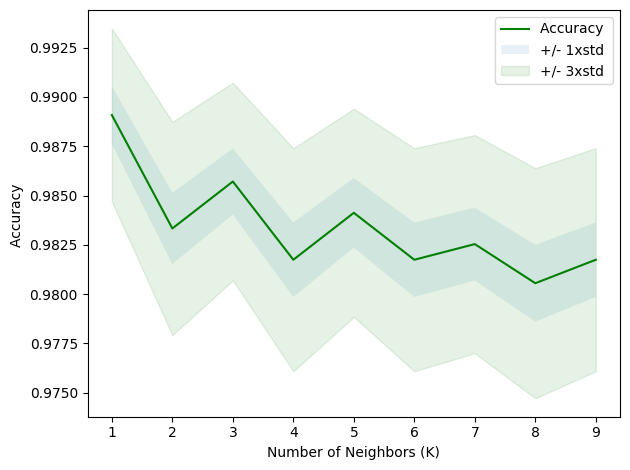

In [50]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9890851359396706 with k= 1


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2365
           1       0.99      0.98      0.98      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039

Confusion matrix, without normalization
[[2333   32]
 [  60 2614]]


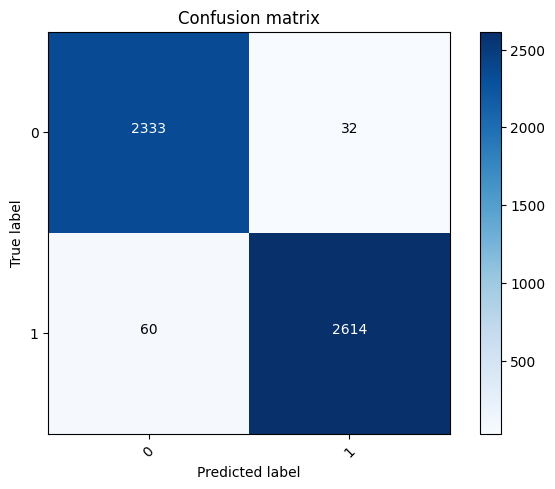

In [52]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_knn)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_knn))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **XGBoost Gradient Boosting Model**

In [53]:
#!pip install xgboost # Install XGBoost library
from xgboost import XGBClassifier # Import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
xgb_train, xgb_test = xgb_model.score(X_train , Y_train), xgb_model.score(X_test , Y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 1.0
Test Score: 0.9982139313355824


In [54]:
yhat_xgb = xgb_model.predict(X_test)
yhat_xgb [0:5]

array([0, 1, 0, 1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

Confusion matrix, without normalization
[[2359    6]
 [   3 2671]]


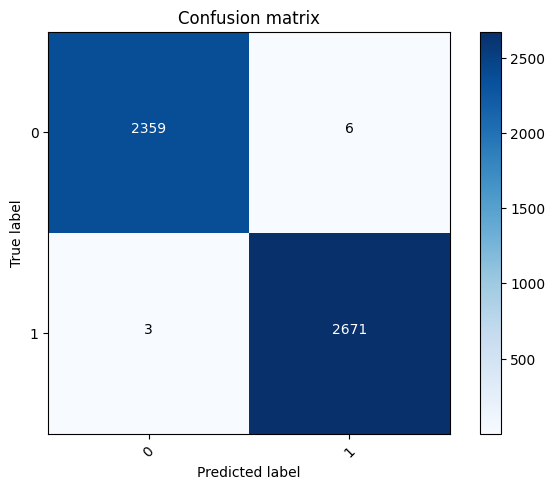

In [55]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_xgb)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_xgb))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
Tree = DecisionTreeClassifier()
Tree # it shows the default parameters

DecisionTreeClassifier()

In [57]:
Tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
yhat_dt= Tree.predict(X_test)

In [59]:
print (yhat_dt [0:5])
print (Y_test [0:5])


[0 1 0 1 0]
19064    0
11127    1
6517     0
2973     1
13339    0
Name: class, dtype: int64


In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhat_dt))

DecisionTrees's Accuracy:  0.9962294105973407


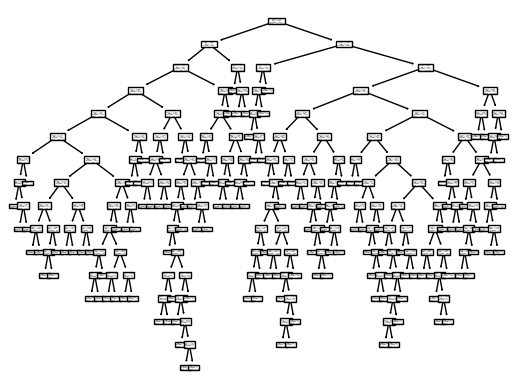

In [61]:
tree.plot_tree(Tree)
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

Confusion matrix, without normalization
[[2358    7]
 [  12 2662]]


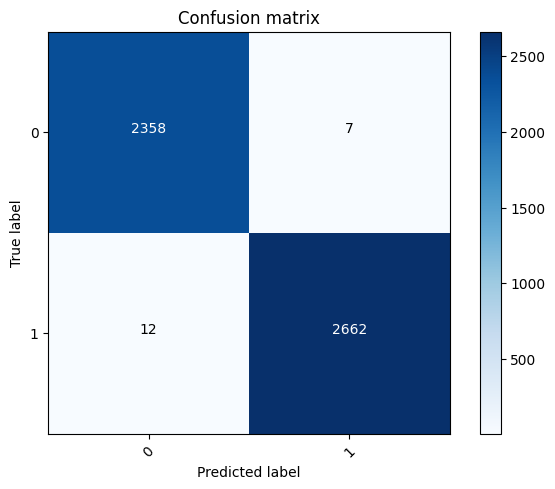

In [62]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_dt)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_dt))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Assuming 'study_rf' comes from a hyperparameter optimization (e.g., Optuna)
# Replace these with the actual best parameters if you have them

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

rf_train, rf_test = rf.score(X_train, Y_train), rf.score(X_test, Y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 1.0
Test Score: 0.9984123834094066


In [64]:
yhat_rf = rf.predict(X_test)
yhat_rf [0:5]

array([0, 1, 0, 1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

Confusion matrix, without normalization
[[2361    4]
 [   4 2670]]


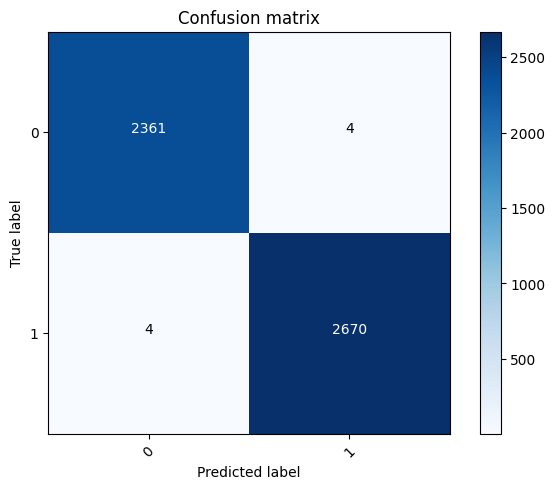

In [65]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_rf)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_rf))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

In [66]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier()

# Make sure you are using the same data for training and testing for consistency
# If X_test needs imputation, apply the same method used to create X_train_imputed
model.fit(X_train, Y_train)  # Use X_train if X_test doesn't require imputation

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Accuracy: 1.00


In [67]:
# Assuming you have already trained and evaluated your models (LR, KNN, XGBoost, Decision Tree, Random Forest)
# and have the predicted values (yhat_lr, yhat_knn, yhat_xgb, yhat_dt, yhat_rf) and true labels (Y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression','support vector machine' ,'KNeighborsClassifier', 'XGBoost', 'Decision Tree', 'Random Forest']
predictions = [yhat_lr, yhat_svm,yhat_knn, yhat_xgb, yhat_dt, yhat_rf]

results = []
for model, yhat in zip(models, predictions):
    accuracy = accuracy_score(Y_test, yhat)
    precision = precision_score(Y_test, yhat)
    recall = recall_score(Y_test, yhat)
    f1 = f1_score(Y_test, yhat)
    results.append([model, accuracy, precision, recall, f1])

# Create a pandas DataFrame for the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the table
print(df_results)

                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.933519   0.921138  0.956619  0.938543
1  support vector machine  0.972415   0.965138  0.983545  0.974254
2    KNeighborsClassifier  0.981742   0.987906  0.977562  0.982707
3                 XGBoost  0.998214   0.997759  0.998878  0.998318
4           Decision Tree  0.996229   0.997377  0.995512  0.996444
5           Random Forest  0.998412   0.998504  0.998504  0.998504


# **Parameters tunning**

# **Make prediction**

In [68]:
# Assuming 'X_train' has the correct shape (number of features) for prediction,
# create a sample input similar to how 'X_train' is structured.
# Replace the placeholders below with actual values from your dataset.

#sample_input = [[1, 46, 5, 0, 0, 123, 0.05, 0.07, 26,0.1]]
#sample_input = [["tcp", "ftp-data","SF", 491, 0, 2, 0.17, 0.03,25, 0.17]]

# Make sure this list has 10 values, corresponding to the 10 features

#Xpred = model.predict(sample_input)
#if Xpred==1 :
 # print("normal")
#else:
 # print("anormal")

In [69]:
#test.head()

In [70]:
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder
# Assuming 'test' is your NumPy array, convert it to a DataFrame
#test = pd.DataFrame(test)  # You might need to provide column names if they're not in the array
# Now you can use the drop method
#X0 = test.drop(['class'], axis=1)
#Y0 = test['class']
#print(X0)
#le(test)


In [71]:
#test1 = test[selected_features]
# ... (your existing code)

#print(test1)  # Check if 'test' contains data



In [72]:
# Now try prediction again
#Xpred1 = xgb_model.predict(test1)
#print(Xpred1)
#if (Xpred1.all()==Y0.all()):
 # print("correct")
#else:
 # print("incorrect")


In [73]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Assuming 'X' and 'Y' are your feature matrix and target vector after preprocessing

# Initialize the model
model = RandomForestClassifier()

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00


# **parameters tunning**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_lr = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score:  0.9261648403532672


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_knn = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score:  0.9863542040501251


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = DecisionTreeClassifier()


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_dt = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9954844865444172


In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_xgb = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best score:  0.9966753934920003


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_rf = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_
# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9967250459066305


In [79]:
# Assuming you have already trained and evaluated your models (LR, KNN, XGBoost, Decision Tree, Random Forest)
# and have the predicted values (yhat_lr, yhat_knn, yhat_xgb, yhat_dt, yhat_rf) and true labels (Y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression' ,'KNeighborsClassifier', 'XGBoost', 'Decision Tree', 'Random Forest']
predictions = [y_pred_lr,y_pred_knn, y_pred_xgb, y_pred_dt, y_pred_rf]

results = []
for model, yhat in zip(models, predictions):
    accuracy = accuracy_score(Y_test, yhat)
    precision = precision_score(Y_test, yhat)
    recall = recall_score(Y_test, yhat)
    f1 = f1_score(Y_test, yhat)
    results.append([model, accuracy, precision, recall, f1])

# Create a pandas DataFrame for the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the table
print(df_results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.933122   0.918667  0.958863  0.938335
1  KNeighborsClassifier  0.988688   0.992473  0.986163  0.989308
2               XGBoost  0.998412   0.998132  0.998878  0.998505
3         Decision Tree  0.996428   0.996263  0.997008  0.996636
4         Random Forest  0.998015   0.998130  0.998130  0.998130


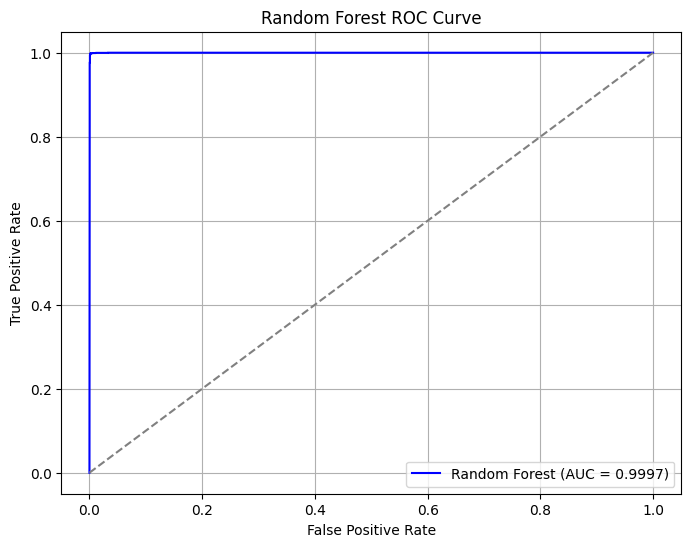

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with the best parameters after tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=1, random_state=42)

 #Train models
rf_model.fit(X_train, Y_train)


# Get probabilities for the positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

# Calculate AUC score
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

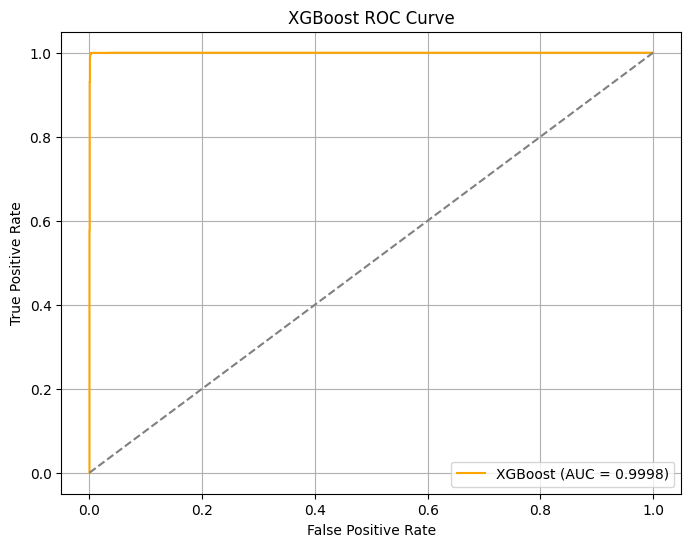

In [81]:
xgb_model = XGBClassifier(n_estimators=200, subsample=1.0, max_depth=5, colsample_bytree= 0.6, learning_rate=0.2, random_state=42)
# Train the model
xgb_model.fit(X_train, Y_train)

# Get probabilities for the positive class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_probs)

# Calculate AUC score
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.4f})', color='orange')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

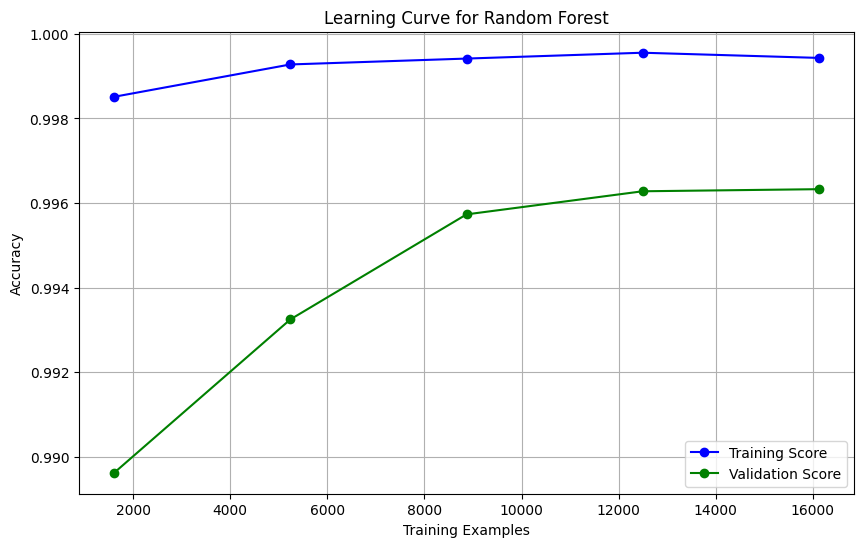

In [82]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validation Score')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Random Forest Learning Curve
plot_learning_curve(rf_model, X_train, Y_train, "Learning Curve for Random Forest")

# XGBoost Learning Curve
#plot_learning_curve(xgb_model, X_train, Y_train, "Learning Curve for XGBoost")


In [83]:
from sklearn.model_selection import cross_val_score

# Example for Random Forest
cross_val_scores = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 0.9968


In [84]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
rf_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy: ", scores.mean())


Cross-validation accuracy:  0.9964273284033849


In [85]:
from sklearn.ensemble import RandomForestClassifier

# Regularization using hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,  # Limits depth of trees
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=4,  # Minimum samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    random_state=42
)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [86]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using feature importance from Random Forest
#rf_model = RandomForestClassifier(random_state=42)
#rf_model.fit(X_train, Y_train)

# Select the top important features
#selector = SelectFromModel(rf_model, threshold="mean")
#X_train_selected = selector.transform(X_train)
#X_test_selected = selector.transform(X_test)

# Train a new model with selected features
#rf_model_selected = RandomForestClassifier(random_state=42)
#rf_model_selected.fit(X_train_selected, Y_train)


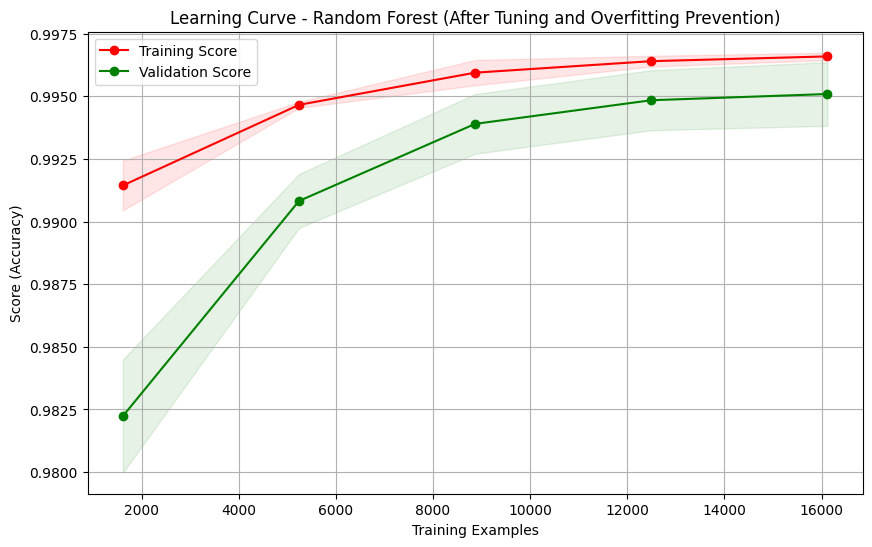

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train_resampled, y_train_resampled are your resampled data after applying techniques like SMOTE
# Or use your original X_train, y_train if resampling isn't applied

# Define the tuned Random Forest model
#rf_model = RandomForestClassifier(
 #   n_estimators=200,
  #  max_depth=10,
   # min_samples_split=5,
    #min_samples_leaf=4,
    #max_features='sqrt',
    #random_state=42
#)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, Y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")

# Add labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.title("Learning Curve - Random Forest (After Tuning and Overfitting Prevention)")
plt.legend(loc="best")
plt.grid()
plt.show()


In [88]:
import joblib
scaler = StandardScaler()
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
   label_encoders[column] = LabelEncoder()
   data[column] = label_encoders[column].fit_transform(data[column])
# Save the model
joblib.dump(rf_model, 'model.joblib')
joblib.dump(imputer, 'imputer.joblib')
# Save the scaler and label encoders for preprocessing during inference
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')


['label_encoders.joblib']

# **TEST**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data1 = pd.read_csv('/content/Test_data.csv')

In [90]:
print(f"Number of null values: {data1.isnull().sum()}")

Number of null values: duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate       

In [91]:
# check if there are a duplicated values or not
data1.drop_duplicates(inplace=True)
print(f"Number of duplicates: {data1.duplicated().sum()}")

Number of duplicates: 0


In [92]:
input_data_dropped =data1.dropna()  # Drops rows with any missing values

In [93]:
#Drop the redundant feature
data1.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [94]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # Reinitialize for new data
X=data.drop(['class'],axis=1)
y_additional_test=data['class']
print(X)
print(y_additional_test)
X_additional_test = scale.fit_transform(X)
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split

# Convert NumPy array back to DataFrame to use column names for selection
X_additional_test_df = pd.DataFrame(X_additional_test, columns=X.columns)
X_additional_test = X_additional_test_df[selected_features]  # Select columns using feature names

print(X_additional_test)

       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       19     9        491          0     0   
1             0              2       41     9        146          0     0   
2             0              1       46     5          0          0     0   
3             0              1       22     9        232       8153     0   
4             0              1       22     9        199        420     0   
...         ...            ...      ...   ...        ...        ...   ...   
25187         0              1       16     2          0          0     0   
25188         0              1       19     9        334          0     0   
25189         0              1       46     1          0          0     0   
25190         0              1       38     5          0          0     0   
25191         0              1       17     5          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf_model.fit(X_train, Y_train)
# Make predictions on the additional test data
y_additional_pred = rf_model.predict(X_additional_test)

# Convert predictions to numerical labels (assuming 'anomaly' is 1 and 'normal' is 0)
y_additional_pred_numeric = [1 if pred == 'anomaly' else 0 for pred in y_additional_pred]

# Calculate performance metrics using the numerical predictions
additional_accuracy = accuracy_score(y_additional_test, y_additional_pred_numeric)  # Use numerical predictions
additional_precision = precision_score(y_additional_test, y_additional_pred_numeric, average='weighted')
additional_recall = recall_score(y_additional_test, y_additional_pred_numeric, average='weighted')
additional_f1 = f1_score(y_additional_test, y_additional_pred_numeric, average='weighted')

# Print the results
print(f"Additional Test Accuracy: {additional_accuracy:.4f}")
print(f"Additional Test Precision: {additional_precision:.4f}")
print(f"Additional Test Recall: {additional_recall:.4f}")
print(f"Additional Test F1 Score: {additional_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Additional Test Accuracy: 0.4661
Additional Test Precision: 0.2173
Additional Test Recall: 0.4661
Additional Test F1 Score: 0.2964


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


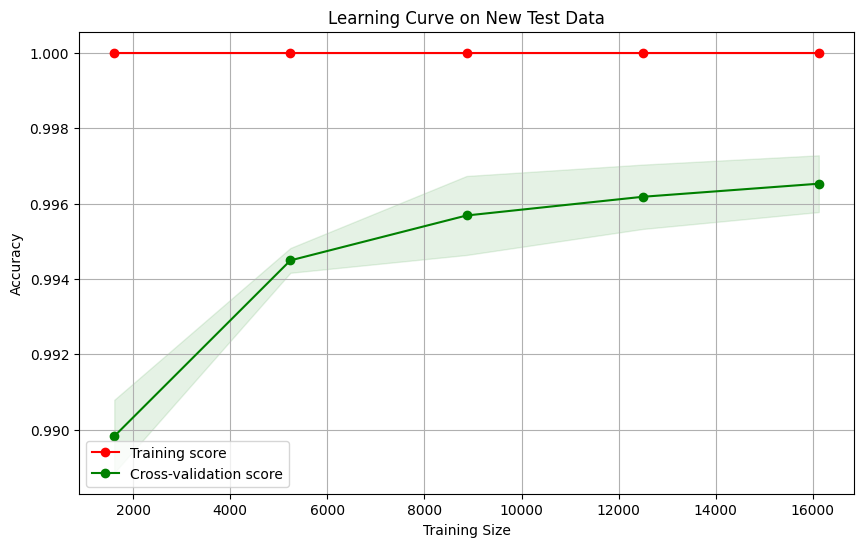

Accuracy on new test data: 0.9976


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume you already have your trained model
# Random Forest or XGBoost model (best_rf or best_xgb)
model = RandomForestClassifier()  # Or XGBClassifier(), replace with your tuned model

# New test data (X_test_new, y_test_new) should be preprocessed as required
# Replace X_test_new, y_test_new with your actual new test dataset
# X_new and y_new should be defined earlier
# X_new, y_new is your new dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_additional_test, y_additional_test, test_size=0.2, random_state=42)


# Learning Curve Calculation
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_new, y_train_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)


# Compute mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve on New Test Data")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# Evaluate the model on new test data and print accuracy
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy on new test data: {accuracy_new:.4f}")


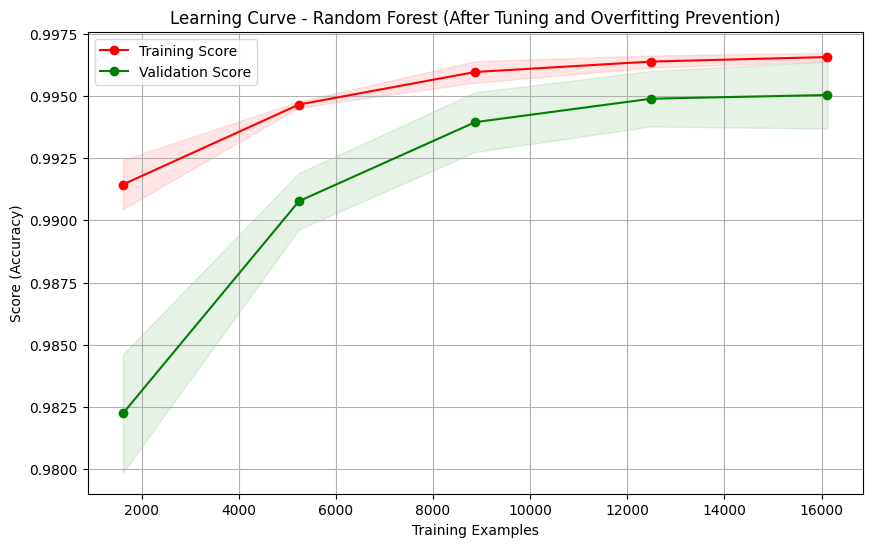

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train_resampled, y_train_resampled are your resampled data after applying techniques like SMOTE
# Or use your original X_train, y_train if resampling isn't applied

# Define the tuned Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_new, y_train_new, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")

# Add labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.title("Learning Curve - Random Forest (After Tuning and Overfitting Prevention)")
plt.legend(loc="best")
plt.grid()
plt.show()
